**Problem Definition:**

The target is to find and predict the customer's tendency to default on their loans based on the LoanTap's accumulated data. The aim can be divided into two separate sub aims that are as follow:


**Exploratory Data Analysis (EDA):**

- Identify patterns among loan defaulters. See how various parameters are varying for the different groups of loan repayers and loan defaulters.
Evaluate the significance of different features in predicting default behavior. - Identify which features need to be monitored more closely while giving loans to potential customers
- There are some features which are not elaborated upon by the company like "Grade". See if the company's classification is correct and these features are actually useful in predicting a customer's ability to default or not.


**Supervised Machine Learning**

- Develop a Robust Predictive Model: Train a reliable model to accurately forecast a client's loan repayment likelihood. Pick the accuracy metric that is the most relevant to the problem and tune the model to get it the desired/acceptable range.
- Implement Logistic Regression: Employ binary classification to predict whether a new customer will repay the loan based on given variables. Through the regression, check the importance of various features that are key in determining the customer's tendency to default.







## **Data Loading**

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as s
import io

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving logistic_regression (1) - Cleaned.csv to logistic_regression (1) - Cleaned (1).csv


**Note:** Due to the immense size of the .csv some columns have been removed and a cleaned dataset (logistic_regression (1) - Cleaned.csv) is used in the analysis. The columns removed contained categories with high no. of unique values in a data intensive long length string format. For analysis, they have been uploaded separately.  

In [ ]:
data = pd.read_csv(io.BytesIO(uploaded['logistic_regression (1) - Cleaned (1).csv']))

In [ ]:
pd.set_option('display.max_columns', 50)

## **Data Preparation**

In [ ]:
df = data.copy()
df.head(3)

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,dti,earliest_cr_line,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies
0,10000,36 months,11.44,329.48,B,B4,10+ years,RENT,117000.0,Not Verified,Jan-15,Fully Paid,vacation,26.24,Jun-90,16,0,36369,41.8,25,w,INDIVIDUAL,0.0,0.0
1,8000,36 months,11.99,265.68,B,B5,4 years,MORTGAGE,65000.0,Not Verified,Jan-15,Fully Paid,debt_consolidation,22.05,Jul-04,17,0,20131,53.3,27,f,INDIVIDUAL,3.0,0.0
2,15600,36 months,10.49,506.97,B,B3,< 1 year,RENT,43057.0,Source Verified,Jan-15,Fully Paid,credit_card,12.79,Aug-07,13,0,11987,92.2,26,f,INDIVIDUAL,0.0,0.0


**Information about the cleaned DataFrame**

In [ ]:
print(df.columns)

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'purpose', 'dti', 'earliest_cr_line',
       'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'initial_list_status', 'application_type', 'mort_acc',
       'pub_rec_bankruptcies'],
      dtype='object')


- Correcting column names - NO NEED

In [ ]:
df.shape

(396030, 24)

- CLEANED Dataframe consists of 396030 rows and 24 columns

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 24 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  int64  
 1   term                  396030 non-null  object 
 2   int_rate              396030 non-null  float64
 3   installment           396030 non-null  float64
 4   grade                 396030 non-null  object 
 5   sub_grade             396030 non-null  object 
 6   emp_length            377729 non-null  object 
 7   home_ownership        396030 non-null  object 
 8   annual_inc            396030 non-null  float64
 9   verification_status   396030 non-null  object 
 10  issue_d               396030 non-null  object 
 11  loan_status           396030 non-null  object 
 12  purpose               396030 non-null  object 
 13  dti                   396030 non-null  float64
 14  earliest_cr_line      396030 non-null  object 
 15  

- Data types are correct for all the columns

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
loan_amnt,396030.0,14113.888089,8357.441341,500.00,8000.00,12000.00,20000.00,40000.00
int_rate,396030.0,13.639400,4.472157,5.32,10.49,13.33,16.49,30.99
installment,396030.0,431.849698,250.727790,16.08,250.33,375.43,567.30,1533.81
annual_inc,396030.0,74203.175798,61637.621158,0.00,45000.00,64000.00,90000.00,8706582.00
dti,396030.0,17.379514,18.019092,0.00,11.28,16.91,22.98,9999.00
open_acc,396030.0,11.311153,5.137649,0.00,8.00,10.00,14.00,90.00
pub_rec,396030.0,0.178191,0.530671,0.00,0.00,0.00,0.00,86.00
revol_bal,396030.0,15844.539853,20591.836109,0.00,6025.00,11181.00,19620.00,1743266.00
revol_util,395754.0,53.791749,24.452193,0.00,35.80,54.80,72.90,892.30
total_acc,396030.0,25.414744,11.886991,2.00,17.00,24.00,32.00,151.00


- From min and max columns: No outliers in numerical data
- Serial no. is a useless column

**Missing Value Treatment**

In [ ]:
print(f'No. of Null Rows before Imputation:\n')
print(((df.isnull().sum()/len(df))*100).sort_values(ascending=False))
print(f'\n \nNo. of duplicated rows are: {df.duplicated().sum()}')

No. of Null Rows before Imputation:

mort_acc                9.543469
emp_length              4.621115
pub_rec_bankruptcies    0.135091
revol_util              0.069692
dti                     0.000000
application_type        0.000000
initial_list_status     0.000000
total_acc               0.000000
revol_bal               0.000000
pub_rec                 0.000000
open_acc                0.000000
earliest_cr_line        0.000000
loan_amnt               0.000000
term                    0.000000
loan_status             0.000000
issue_d                 0.000000
verification_status     0.000000
annual_inc              0.000000
home_ownership          0.000000
sub_grade               0.000000
grade                   0.000000
installment             0.000000
int_rate                0.000000
purpose                 0.000000
dtype: float64

 
No. of duplicated rows are: 0


- No duplicate values in any of the columns, but multiple columns with null rows

In [ ]:
from scipy.stats import chi2_contingency

ctable = pd.crosstab(df['emp_length'], df['purpose'])
v1, p, v2, v3 = chi2_contingency(ctable)
if p < 0.05:
    print("Significant Accociation Between Columns.")
else:
    print("No Significant Accociation Exists.")

df['emp_length'] = df.groupby('pub_rec_bankruptcies')['emp_length'].transform(lambda x: x.fillna(x.mode()[0]))

#**************************************************************************************************************************

ctable = pd.crosstab(df['mort_acc'], df['pub_rec_bankruptcies'])
v1, p, v2, v3 = chi2_contingency(ctable)
if p < 0.05:
    print("Significant Accociation Between Columns.")
else:
    print("No Significant Accociation Exists.")

df['mort_acc'] = df.groupby('pub_rec_bankruptcies')['mort_acc'].transform(lambda x: x.fillna(x.mode()[0]))

#**************************************************************************************************************************

df['annual_inc'] = df.groupby('emp_length')['annual_inc'].transform(lambda x: x.fillna(x.mean()))

df['dti'] = df.groupby('grade')['dti'].transform(lambda x: x.fillna(x.mean()))

Significant Accociation Between Columns.
Significant Accociation Between Columns.


Null Values for these **numrical columns** have been imputed using the **categorical columns** in the brackets:

- Annual Income (based on mean incomes of the clients having same Duration of Employment)
- Debt to Income Ratio (based on the mean of similar Grade clientsy)

Null Values for these **categorical columns** have been imputed using the columns in the brackets, after checking for the existence of relationship by the **Chi2Contingency tests**:

- Mortgage Account No. (based on Mode of another negative trait, Records of Public Bankruptcies)
- Employment Length (based on the reason of taking a loan)

In [ ]:
print(f'No. of Null Rows after Imputation:\n')
print(((df.isnull().sum()/len(df))*100).sort_values(ascending=False))
print(f'\n \nNo. of duplicated rows are: {df.duplicated().sum()}')

No. of Null Rows after Imputation:

pub_rec_bankruptcies    0.135091
mort_acc                0.135091
emp_length              0.135091
annual_inc              0.135091
revol_util              0.069692
dti                     0.000000
application_type        0.000000
initial_list_status     0.000000
total_acc               0.000000
revol_bal               0.000000
pub_rec                 0.000000
open_acc                0.000000
earliest_cr_line        0.000000
loan_amnt               0.000000
term                    0.000000
loan_status             0.000000
issue_d                 0.000000
verification_status     0.000000
home_ownership          0.000000
sub_grade               0.000000
grade                   0.000000
installment             0.000000
int_rate                0.000000
purpose                 0.000000
dtype: float64

 
No. of duplicated rows are: 0


In [ ]:
df = df.dropna(axis=0)
df.shape

(395219, 24)

- Since the data is already too cleaned and no. of null values too low, deleting the null rows from the DataFrame for all the other columns

**New Flag Rating System (Boolean, 1 if yes, else 0 or does not exist)**

In [ ]:
df['pub_rec'] = df['pub_rec'].apply(lambda x: 1 if x == 0 else 0)

df['mort_acc'] = df['mort_acc'].apply(lambda x: 1 if x == 0 else 0)

df['pub_rec_bankruptcies'] = df['pub_rec_bankruptcies'].apply(lambda x: 1 if x == 0 else 0)

print(df['pub_rec'].value_counts(), '\n\n',
      df['mort_acc'].value_counts(), '\n\n',
      df['pub_rec_bankruptcies'].value_counts())

pub_rec
1    337489
0     57730
Name: count, dtype: int64 

 mort_acc
0    218306
1    176913
Name: count, dtype: int64 

 pub_rec_bankruptcies
1    350108
0     45111
Name: count, dtype: int64


## **Univariate Analysis**

In [ ]:
numerical_cols = [col for col in df.columns if col in df.describe().columns]
df[numerical_cols].head(3)

,loan_amnt,int_rate,installment,annual_inc,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies
0,10000,11.44,329.48,117000.0,26.24,16,1,36369,41.8,25,1,1
1,8000,11.99,265.68,65000.0,22.05,17,1,20131,53.3,27,0,1
2,15600,10.49,506.97,43057.0,12.79,13,1,11987,92.2,26,1,1


In [ ]:
categorical_cols = [col for col in df.columns if col not in df.describe().columns]
df[categorical_cols].head(3)

,term,grade,sub_grade,emp_length,home_ownership,verification_status,issue_d,loan_status,purpose,earliest_cr_line,initial_list_status,application_type
0,36 months,B,B4,10+ years,RENT,Not Verified,Jan-15,Fully Paid,vacation,Jun-90,w,INDIVIDUAL
1,36 months,B,B5,4 years,MORTGAGE,Not Verified,Jan-15,Fully Paid,debt_consolidation,Jul-04,f,INDIVIDUAL
2,36 months,B,B3,< 1 year,RENT,Source Verified,Jan-15,Fully Paid,credit_card,Aug-07,f,INDIVIDUAL


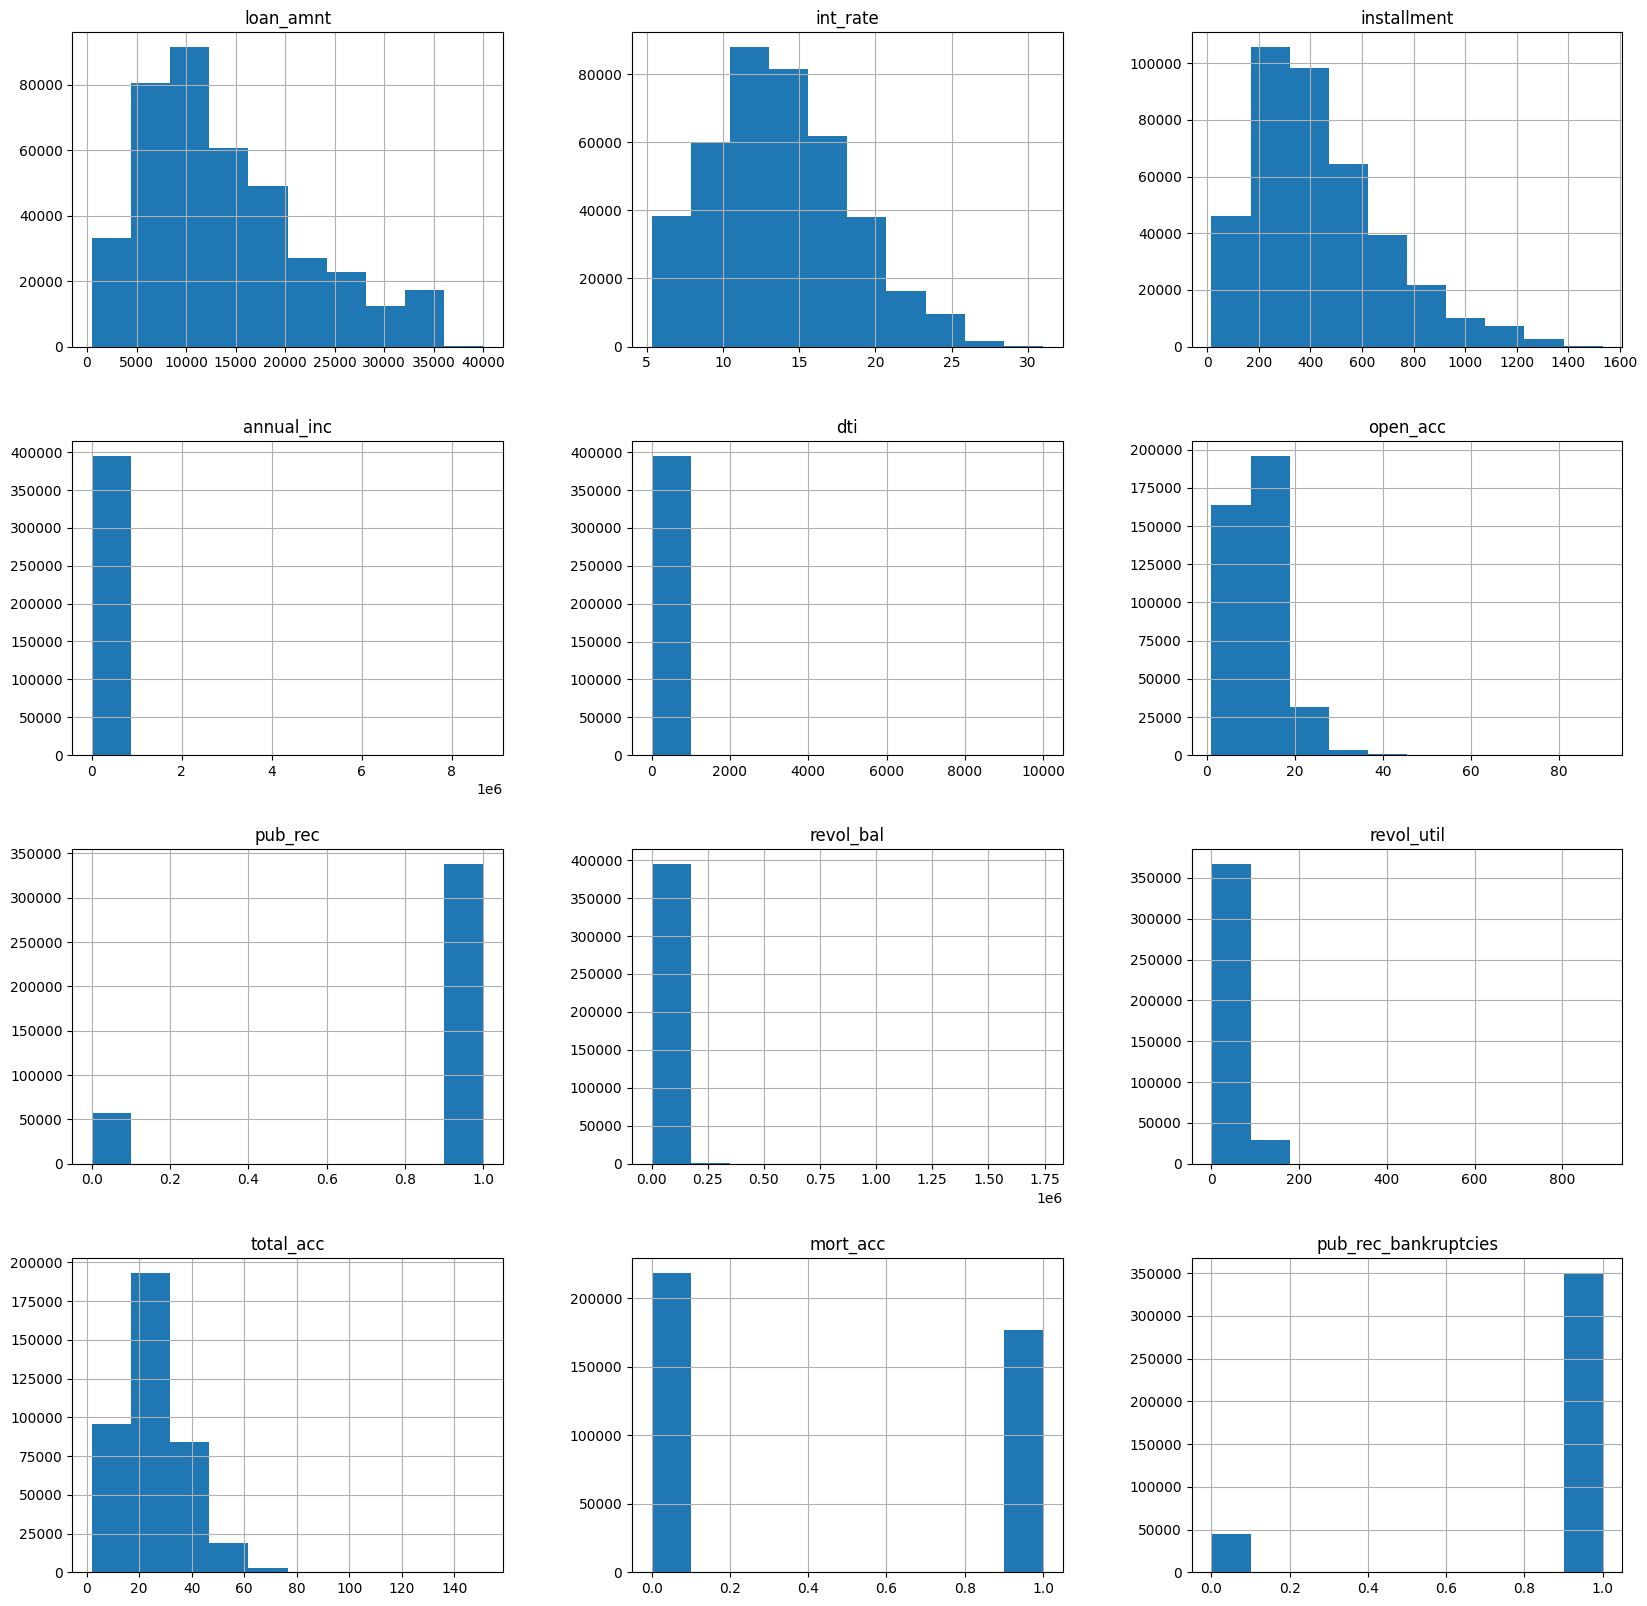

In [ ]:
df.hist(figsize = (20,20))
plt.show()

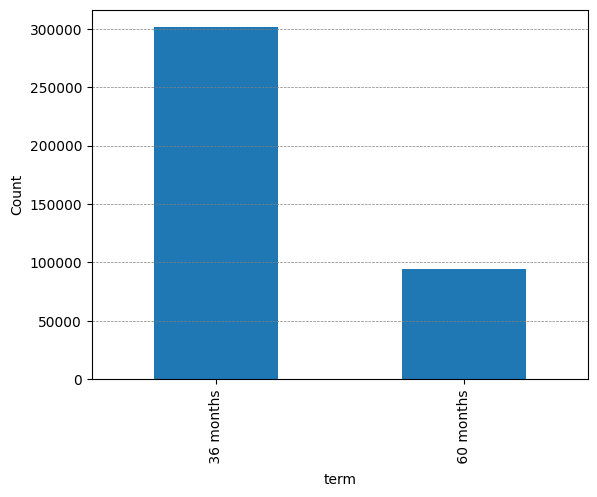

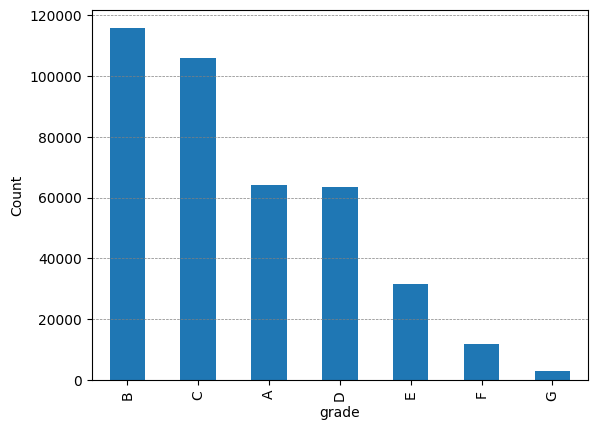

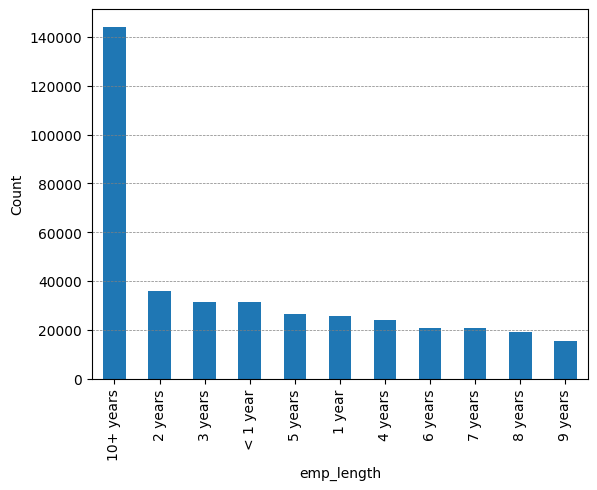

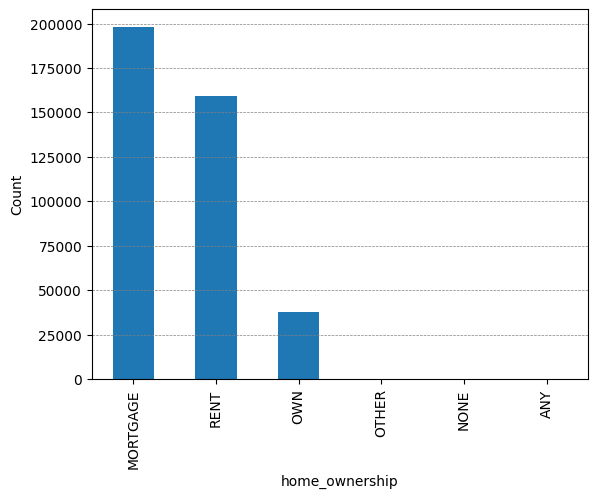

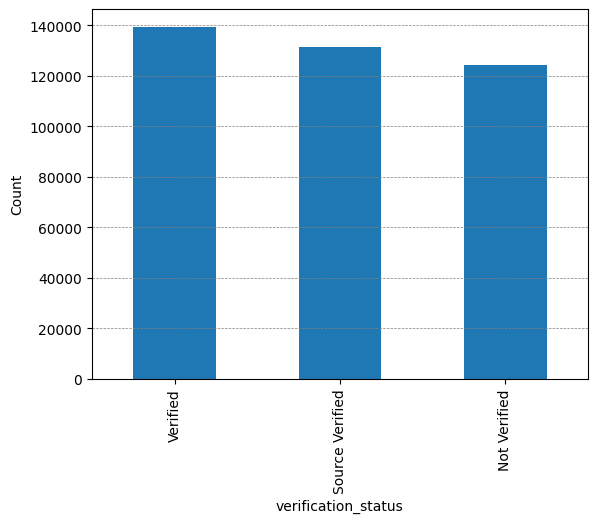

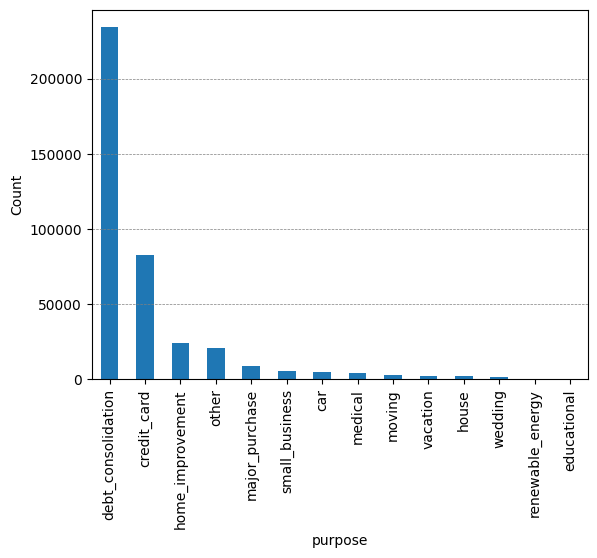

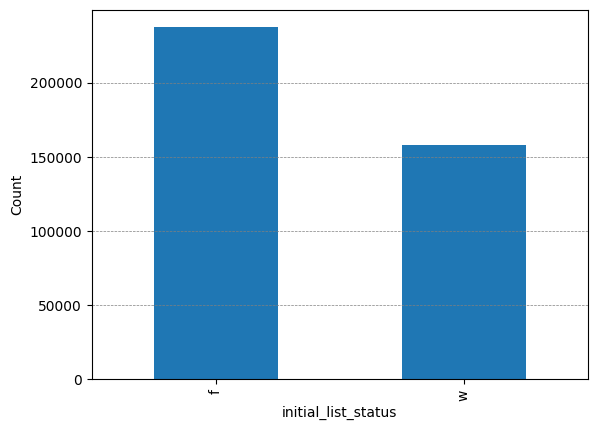

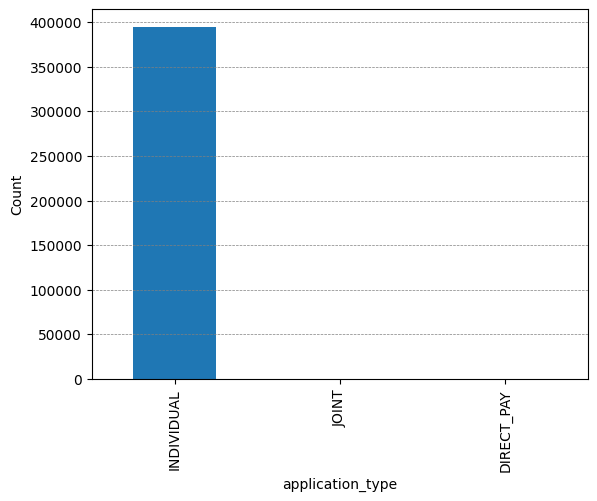

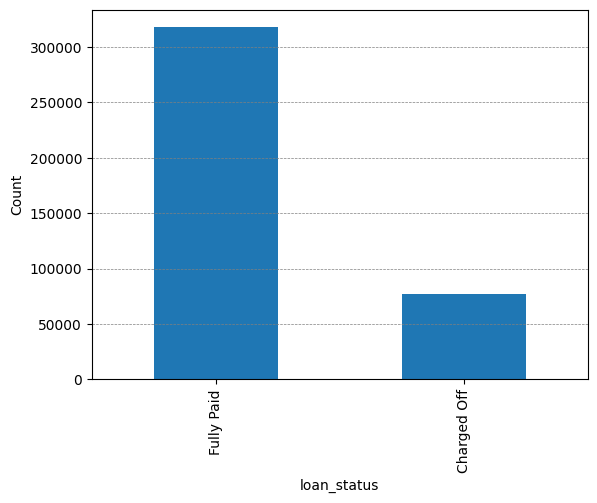

In [ ]:
def plot_value_counts(df, column_name):
  value_counts = df[column_name].value_counts()
  value_counts.plot(kind='bar')
  plt.xlabel(column_name)
  plt.ylabel('Count')
  plt.grid(True, linestyle='--', linewidth=0.5, color='gray', which='both', axis='y')
  plt.show()

# Uses --------------------------------------------------------------------------------------------------------

plot_value_counts(df, 'term')

plot_value_counts(df, 'grade')

plot_value_counts(df, 'emp_length')

plot_value_counts(df, 'home_ownership')

plot_value_counts(df, 'verification_status')

plot_value_counts(df, 'purpose')

# plot_value_counts(df, 'issue_d')

# plot_value_counts(df, 'earliest_cr_line')

plot_value_counts(df, 'initial_list_status')

plot_value_counts(df, 'application_type')

plot_value_counts(df, 'loan_status')

**Insights:**
- Debt Consolidation is the biggest reason for people to take loans
- Highest no. of customers have their properties on Mortgage, followed by on Rent. Owners are very less
- Among the loan appliers, most of the customers are very well experienced and in jobs for a very long time
- Short Term Loans are more popular than Long term Loans

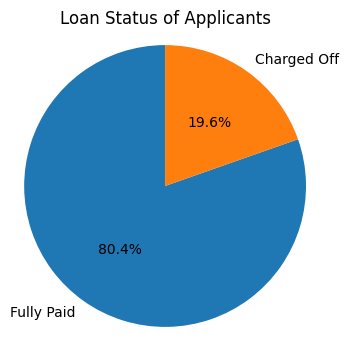

In [ ]:
status_counts = df['loan_status'].value_counts()

labels = status_counts.index.to_numpy()
sizes = status_counts.to_numpy()

fig1, ax1 = plt.subplots(figsize=(4, 4))
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=False, startangle=90, pctdistance=0.55, rotatelabels=False)
ax1.set_title('Loan Status of Applicants')

ax1.axis('equal')
plt.show()

**Insights:**
- A total of 19.6% (or **nearly 1/5 th)** of customers (not counting faulty data) have failed to repay the loans

**Recommendations:**
- The ratio of faulty loans is too high, i.e 1 in 5 clients do not pay back the loans given to them. Hence strict regulations and extreme vetting are needed while giving out loans

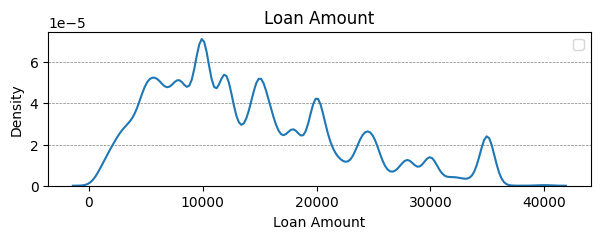

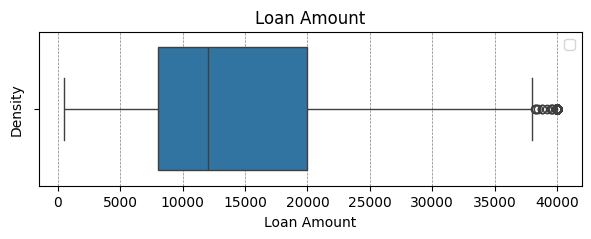

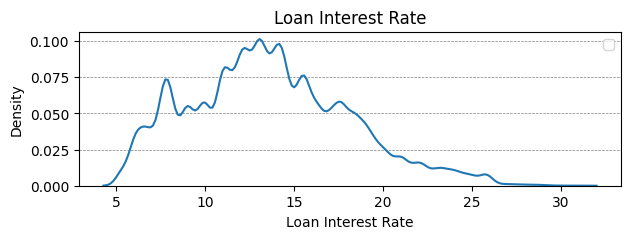

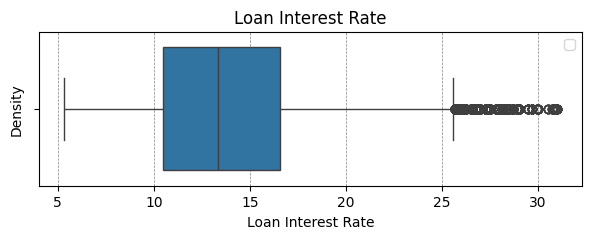

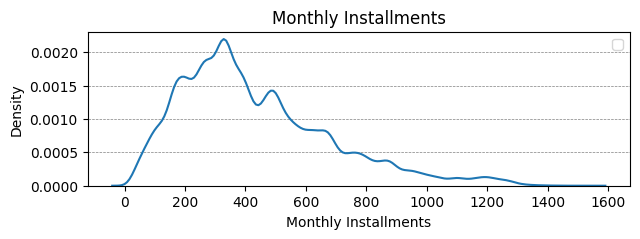

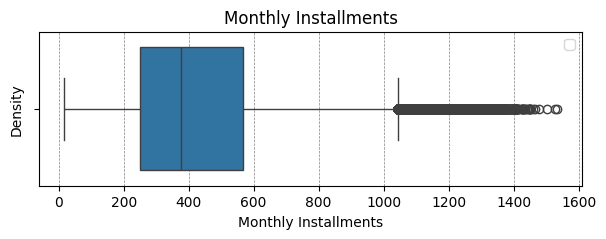

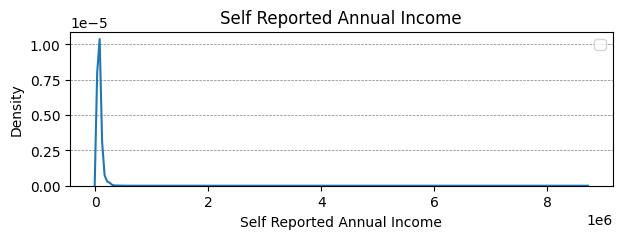

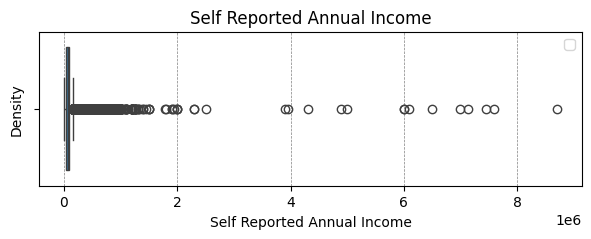

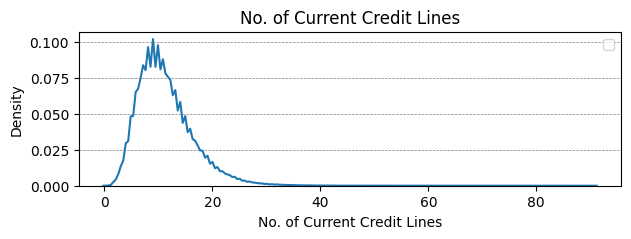

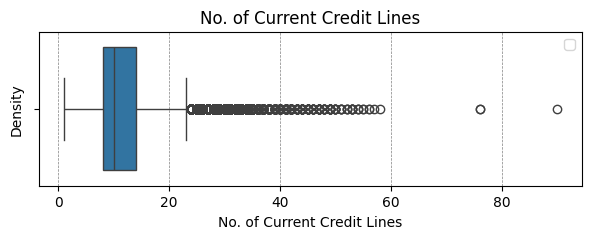

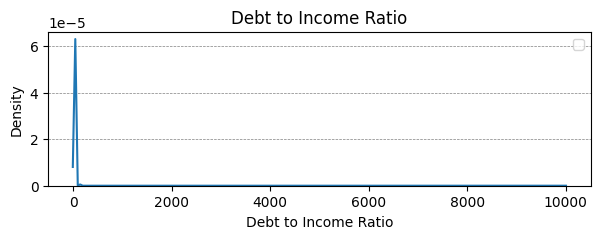

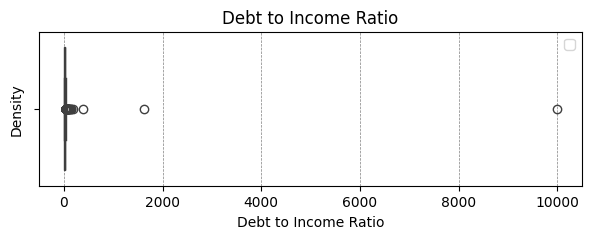

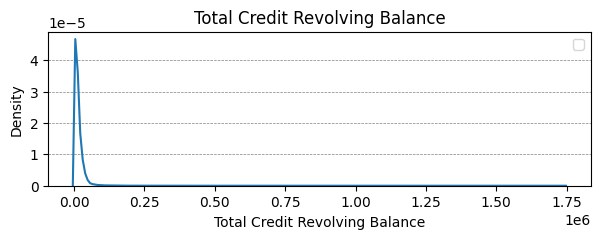

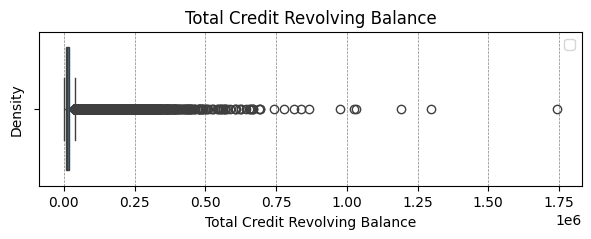

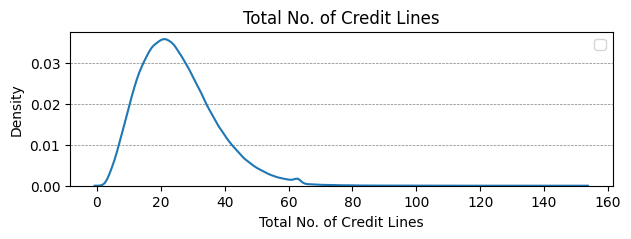

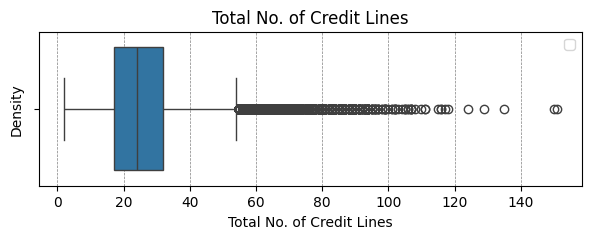

In [ ]:
def univariate(df, column_name='loan_amnt', title='Loan Amount'):

  plt.figure(figsize=(7, 2))
  sns.kdeplot(df[column_name])
  plt.title(title)
  plt.xlabel(title)
  plt.ylabel('Density')
  plt.legend()
  plt.grid(True, linestyle='--', linewidth=0.5, color='gray', which='both', axis='y')
  plt.xticks(rotation=0)

  plt.figure(figsize=(7, 2))
  sns.boxplot(x = df[column_name])
  plt.title(title)
  plt.xlabel(title)
  plt.ylabel('Density')
  plt.legend()
  plt.grid(True, linestyle='--', linewidth=0.5, color='gray', which='both', axis='x')
  plt.xticks(rotation=0)
  plt.show()


# Uses --------------------------------------------------------------------------------------------------------

univariate(df, 'loan_amnt', 'Loan Amount')

univariate(df, 'int_rate', 'Loan Interest Rate')

univariate(df, 'installment', 'Monthly Installments')

univariate(df, 'annual_inc', 'Self Reported Annual Income')

univariate(df, 'open_acc', 'No. of Current Credit Lines')

univariate(df, 'dti', 'Debt to Income Ratio')

univariate(df, 'revol_bal', 'Total Credit Revolving Balance')

univariate(df, 'total_acc', 'Total No. of Credit Lines')

**Insights:**
From the KDE Plots and Boxplots, following columns seem to be imbalanced and skewed because of the outliers:

1. **annual_inc:** Annual income
2. **dti:** Debt-to-income ratio
3. **revol_bal:** Revolving balance
4. **total_acc:** Total number of credit lines
5. **open_acc:** Number of open credit lines

**Recommendations:**
Outlier removal should be done on the following columns to ensure that the data and the analysis is not skewed by some edge cases:
- annual_inc: Annual income
- dti: Debt-to-income ratio
- revol_bal: Revolving balance
- total_acc: Total number of credit lines
- open_acc: Number of open credit lines

## **Outliers Treatment**

In [ ]:
def outliers(df, col, max_outliers=5000):

  Q1 = df[col].quantile(0.25)
  Q3 = df[col].quantile(0.75)
  IQR = Q3 - Q1
  lb = Q1 - (1.5 * IQR)
  ub = Q3 + (1.5 * IQR)

  n = sum((df[col] < lb) | (df[col] > ub))
  print(f'No. of rows that would get deleted from {col} are: {n}')
  print(f'Max outlier limit given is: {max_outliers}')

  if n <= max_outliers:

    filtered_df = df.loc[(df[col] >= lb) & (df[col] <= ub)]
    print(f"Removed {n} outliers from '{col}'.")
    return filtered_df
  else:

    print(f"Skipped outlier removal for '{col}'")
    return df.copy()


# -------------------------------------------------------------------------------------

print("Data Shape Before Outlier Removal: ", df.shape)
print("\n\n","-"*50)

# -------------------------------------------------------------------------------------

c = 'annual_inc'

df = outliers(df, c, 20000)
print(f"Data Shape After Outlier Removal from {c} --> {df.shape}")
print("\n\n","-"*50)

# -------------------------------------------------------------------------------------

c = 'dti'

df = outliers(df, c, 1000)
print(f"Data Shape After Outlier Removal from {c} --> {df.shape}")
print("\n\n","-"*50)


# -------------------------------------------------------------------------------------

c = 'revol_bal'

df = outliers(df, c, 25000)
print(f"Data Shape After Outlier Removal from {c} --> {df.shape}")
print("\n\n","-"*50)


# -------------------------------------------------------------------------------------

c = 'total_acc'

df = outliers(df, c, 10000)
print(f"Data Shape After Outlier Removal from {c} --> {df.shape}")
print("\n\n","-"*50)


# -------------------------------------------------------------------------------------

c = 'open_acc'

df = outliers(df, c, 15000)
print(f"Data Shape After Outlier Removal from {c} --> {df.shape}")
print("\n\n","-"*50)

Data Shape Before Outlier Removal:  (395219, 24)


 --------------------------------------------------
No. of rows that would get deleted from annual_inc are: 16649
Max outlier limit given is: 20000
Removed 16649 outliers from 'annual_inc'.
Data Shape After Outlier Removal from annual_inc --> (378570, 24)


 --------------------------------------------------
No. of rows that would get deleted from dti are: 265
Max outlier limit given is: 1000
Removed 265 outliers from 'dti'.
Data Shape After Outlier Removal from dti --> (378305, 24)


 --------------------------------------------------
No. of rows that would get deleted from revol_bal are: 18798
Max outlier limit given is: 25000
Removed 18798 outliers from 'revol_bal'.
Data Shape After Outlier Removal from revol_bal --> (359507, 24)


 --------------------------------------------------
No. of rows that would get deleted from total_acc are: 7592
Max outlier limit given is: 10000
Removed 7592 outliers from 'total_acc'.
Data Shape After O

**Insights:**
- Highest Outliers are removed from "Annual Income Columns"
- Lowest Outliers are removed from Debt To Income Ratio Columns

## **Bivariate Analysis**

**Hypothesis Testing - Independent T-Test**

In [ ]:
from scipy.stats import ttest_ind

def do_ttest(df, col):
  fp = df[df['loan_status'] == 'Fully Paid'][col]
  co = df[df['loan_status'] == 'Charged Off'][col]

  t_stat, p_value = ttest_ind(fp, co)

  if p_value < 0.05:
    print(f"The means of {col} for 'Fully Paid' and 'Charged Off' loans are significantly different.")
  else:
    print(f"The means of {col} for 'Fully Paid' and 'Charged Off' loans are significantly different.")

# Uses --------------------------------------------------------------------------------------------------------

do_ttest(df, 'int_rate')

# -------------------------------------------------------------------------------------------------------------

The means of int_rate for 'Fully Paid' and 'Charged Off' loans are significantly different.


**Hypothesis Testing - Chi2 Contingency Test**

In [ ]:
from scipy.stats import chi2_contingency

def do_chisquare(col1, col2, alpha=0.05):
    contingency_table = pd.crosstab(col1, col2)
    chi2, p, dof, expected = chi2_contingency(contingency_table)

    alpha = 0.05

    if p <= alpha:
        print("Reject the null hypothesis. There is A SIGNIFICANT ASSOCIATION between the columns")
    else:
        print("Fail to reject the null hypothesis. There is NO SIGNIFICANT ASSOCIATION between the columns")

# Uses --------------------------------------------------------------------------------------------------------

do_chisquare(df['application_type'], df['loan_status'])

# -------------------------------------------------------------------------------------------------------------

Reject the null hypothesis. There is A SIGNIFICANT ASSOCIATION between the columns


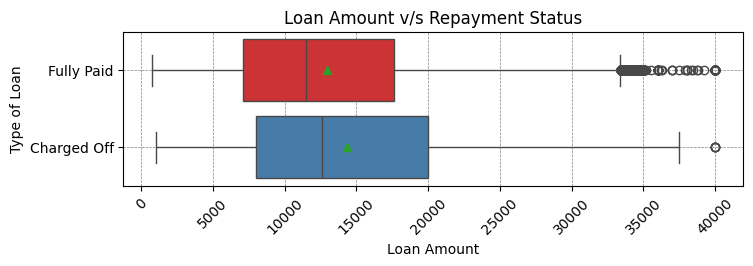

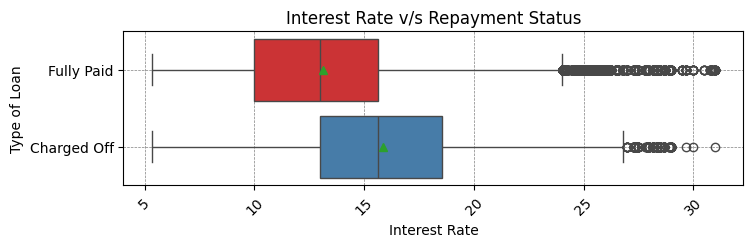

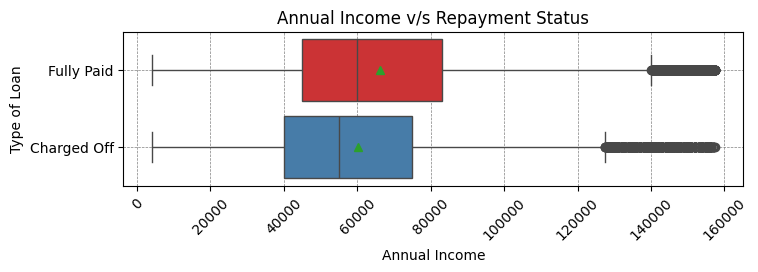

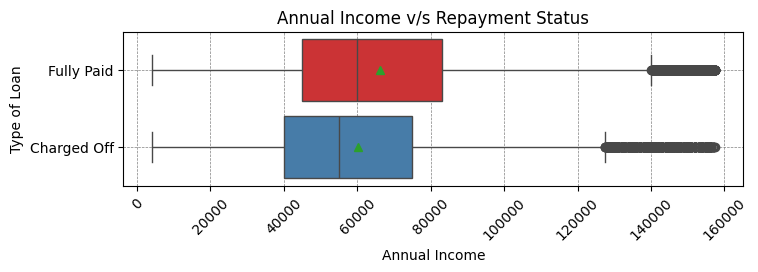

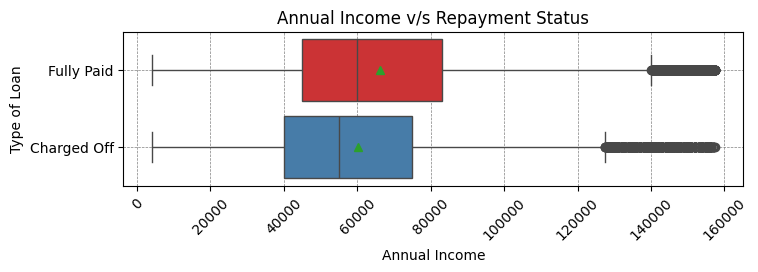

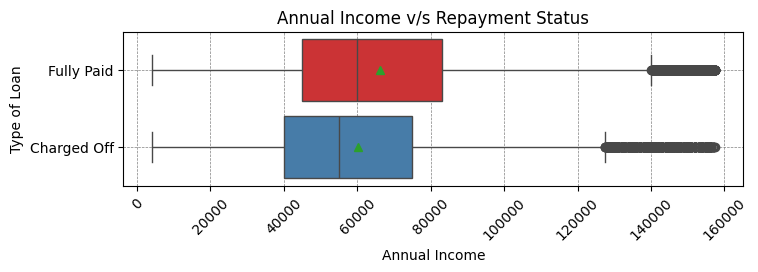

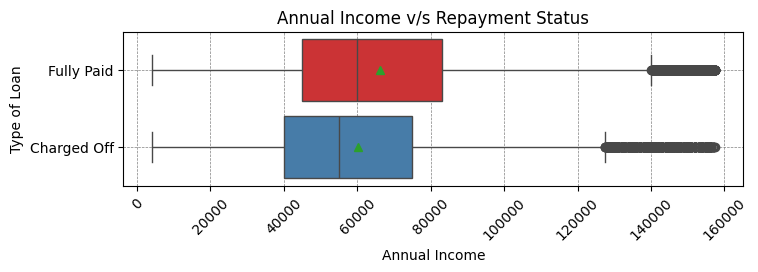

In [ ]:
def plot_boxplot(x, y, title, xlabel, ylabel, hue=None, palette="Set1", x_rotation=45):
  plt.figure(figsize=(8, 2))
  sns.boxplot(x=x, y=y, hue=hue, showmeans=True, palette=palette)
  plt.title(title)
  plt.xlabel(xlabel)
  plt.ylabel(ylabel)
  plt.xticks(rotation=x_rotation)
  plt.grid(True, linestyle='--', linewidth=0.5, color='gray', which='major')
  plt.show()

# Uses --------------------------------------------------------------------------------------------------------

plot_boxplot(df['loan_amnt'], df['loan_status'], hue=df['loan_status'],
             xlabel="Loan Amount", ylabel='Type of Loan', title = "Loan Amount v/s Repayment Status")

plot_boxplot(df['int_rate'], df['loan_status'], hue=df['loan_status'],
             xlabel="Interest Rate", ylabel='Type of Loan', title = "Interest Rate v/s Repayment Status")

plot_boxplot(df['annual_inc'], df['loan_status'], hue=df['loan_status'],
             xlabel="Annual Income", ylabel='Type of Loan', title = "Annual Income v/s Repayment Status")

plot_boxplot(df['annual_inc'], df['loan_status'], hue=df['loan_status'],
             xlabel="Annual Income", ylabel='Type of Loan', title = "Annual Income v/s Repayment Status")

plot_boxplot(df['annual_inc'], df['loan_status'], hue=df['loan_status'],
             xlabel="Annual Income", ylabel='Type of Loan', title = "Annual Income v/s Repayment Status")

plot_boxplot(df['annual_inc'], df['loan_status'], hue=df['loan_status'],
             xlabel="Annual Income", ylabel='Type of Loan', title = "Annual Income v/s Repayment Status")

plot_boxplot(df['annual_inc'], df['loan_status'], hue=df['loan_status'],
             xlabel="Annual Income", ylabel='Type of Loan', title = "Annual Income v/s Repayment Status")

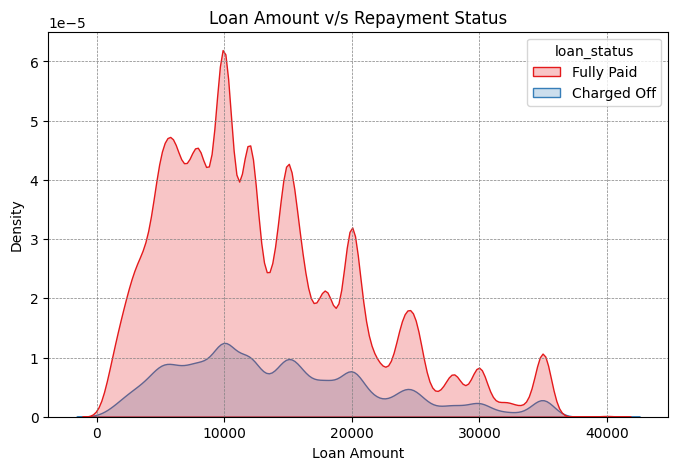

The means of loan_amnt for 'Fully Paid' and 'Charged Off' loans are significantly different.
Mean for fully paid loans:  12982.17
Mean for defaulted loans:  14339.87
----------------------------------------------------------------------------------------------------


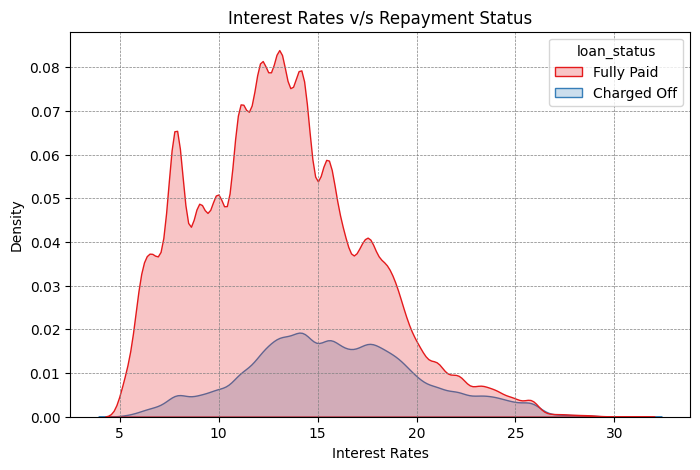

The means of int_rate for 'Fully Paid' and 'Charged Off' loans are significantly different.
Mean for fully paid loans:  13.12
Mean for defaulted loans:  15.87
----------------------------------------------------------------------------------------------------


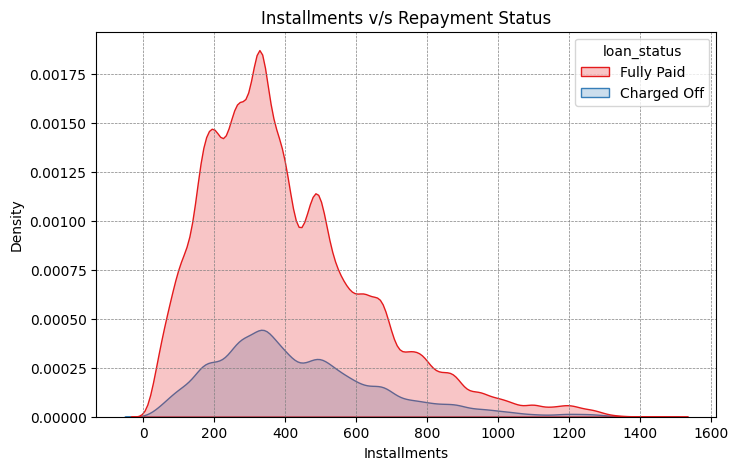

The means of installment for 'Fully Paid' and 'Charged Off' loans are significantly different.
Mean for fully paid loans:  400.9
Mean for defaulted loans:  430.2
----------------------------------------------------------------------------------------------------


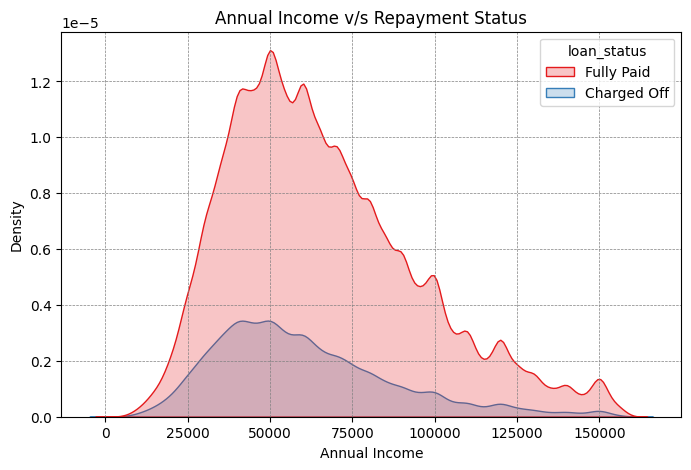

The means of annual_inc for 'Fully Paid' and 'Charged Off' loans are significantly different.
Mean for fully paid loans:  66175.27
Mean for defaulted loans:  60252.19
----------------------------------------------------------------------------------------------------


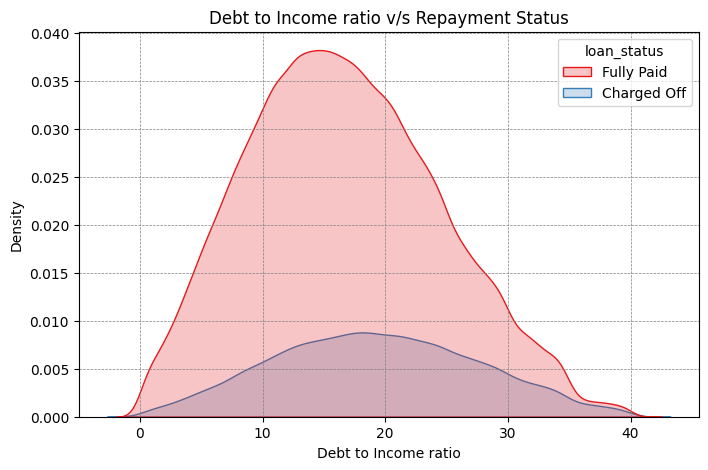

The means of dti for 'Fully Paid' and 'Charged Off' loans are significantly different.
Mean for fully paid loans:  16.67
Mean for defaulted loans:  19.31
----------------------------------------------------------------------------------------------------


In [ ]:
def plot_kde(x, hue, palette="Set1", title=None, xlabel=None, fill=True, x_rotation=45):
  plt.figure(figsize=(8, 5))  # Adjust figure size as needed

  sns.kdeplot(x=x, hue=hue, legend="Loan Status", palette=palette, fill=fill)
  plt.title(title)
  plt.xlabel(xlabel)
  plt.ylabel("Density")
  plt.grid(True, linestyle='--', linewidth=0.5, color='gray', which='major')
  plt.show()


# Uses --------------------------------------------------------------------------------------------------------

plot_kde(df['loan_amnt'], df['loan_status'],
         xlabel="Loan Amount",
         title = "Loan Amount v/s Repayment Status")

do_ttest(df, 'loan_amnt')

print("Mean for fully paid loans: ", round(df[df['loan_status'] == 'Fully Paid']['loan_amnt'].mean(),2))
print("Mean for defaulted loans: ", round(df[df['loan_status'] != 'Fully Paid']['loan_amnt'].mean(),2))

print("-"*100)

plot_kde(df['int_rate'], df['loan_status'],
         xlabel="Interest Rates",
         title = "Interest Rates v/s Repayment Status")

do_ttest(df, 'int_rate')

print("Mean for fully paid loans: ", round(df[df['loan_status'] == 'Fully Paid']['int_rate'].mean(),2))
print("Mean for defaulted loans: ", round(df[df['loan_status'] != 'Fully Paid']['int_rate'].mean(),2))

print("-"*100)

plot_kde(df['installment'], df['loan_status'],
         xlabel="Installments",
         title = "Installments v/s Repayment Status")

do_ttest(df, 'installment')

print("Mean for fully paid loans: ", round(df[df['loan_status'] == 'Fully Paid']['installment'].mean(),2))
print("Mean for defaulted loans: ", round(df[df['loan_status'] != 'Fully Paid']['installment'].mean(),2))

print("-"*100)

plot_kde(df['annual_inc'], df['loan_status'],
         xlabel="Annual Income",
         title = "Annual Income v/s Repayment Status")

do_ttest(df, 'annual_inc')

print("Mean for fully paid loans: ", round(df[df['loan_status'] == 'Fully Paid']['annual_inc'].mean(),2))
print("Mean for defaulted loans: ", round(df[df['loan_status'] != 'Fully Paid']['annual_inc'].mean(),2))

print("-"*100)

plot_kde(df['dti'], df['loan_status'],
         xlabel="Debt to Income ratio",
         title = "Debt to Income ratio v/s Repayment Status")

do_ttest(df, 'dti')

print("Mean for fully paid loans: ", round(df[df['loan_status'] == 'Fully Paid']['dti'].mean(),2))
print("Mean for defaulted loans: ", round(df[df['loan_status'] != 'Fully Paid']['dti'].mean(),2))

print("-"*100)

**Insights:**

The groups who have defaulted on loans had, on average, **higher**
- Loan Amounts
- Interest rates
- Installments values
- Debt to Income ratio
compared to the ones who have fully paid of their loans

However, the group of defaulters also had **lower mean Annual Income** than the ones who have fully paid off their loans

**Recommendations:**

- Lower Loan amounts, Interest rates and Monthly Installments increases the chances of the loan getting repaid hence loans belonging to these options should be preferred
- People with lower DTI ratio should be preferred while giving away loans
- People with higher annual incomes should be preferred while giving away loans


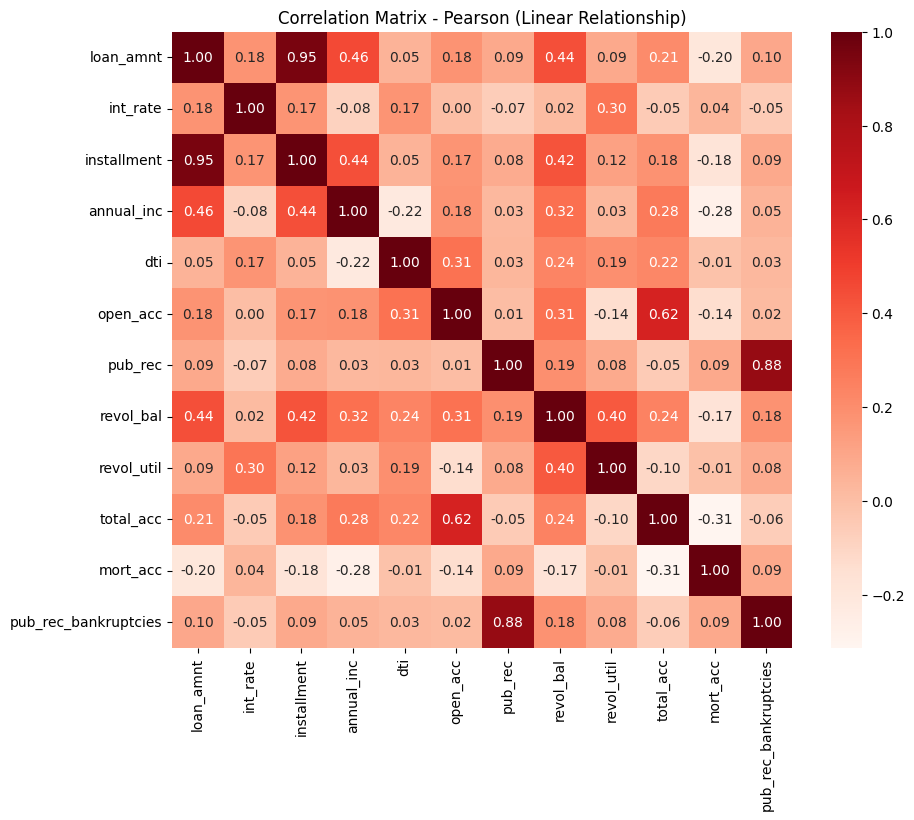

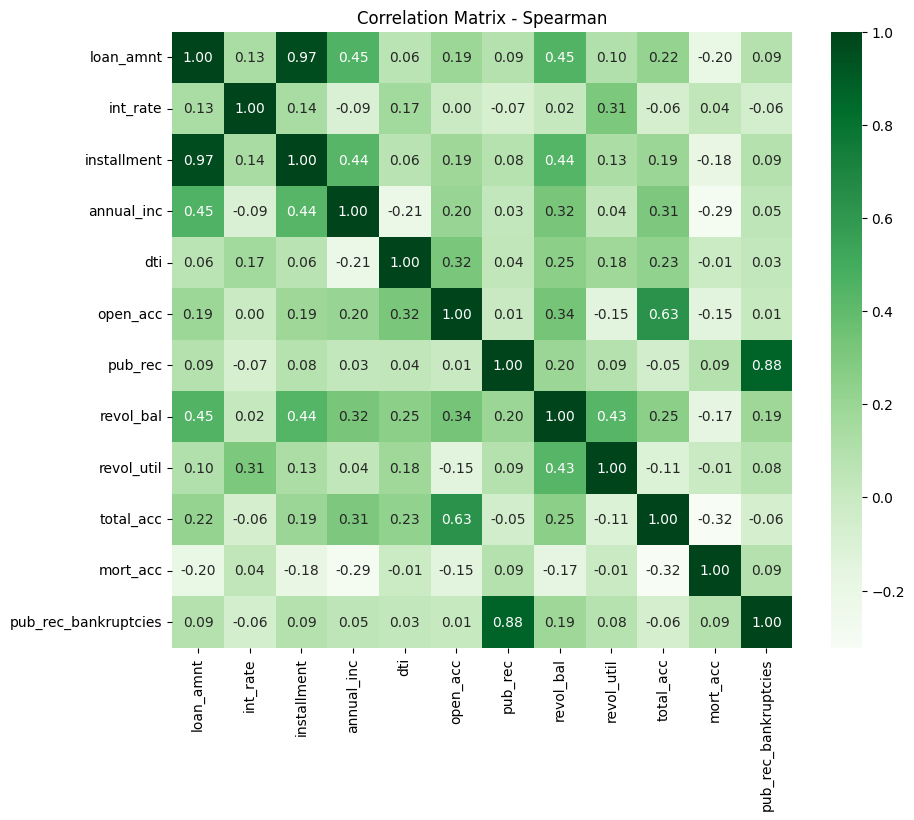

In [ ]:
corr_matrix = df[numerical_cols].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='Reds', fmt='.2f')
plt.title('Correlation Matrix - Pearson (Linear Relationship)')
plt.show()

corr_matrix = df[numerical_cols].corr(method='spearman')

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='Greens', fmt='.2f')
plt.title('Correlation Matrix - Spearman')
plt.show()

**Insights:**

- Very High linear correlation between the Loan Amount and Amount of Installments (0.95)
- Moderate correlation between beween Annual Income as well as Revolving Balance with the Loan Amount. However, the relationship is not linear.  
- Negative Correlation between the No. of Mortgage Accounts and Loan Amounts.
- Very High Linear Correlation between Number of derogatory public records and Number of public record bankruptcies
- Moderate Negative Correlation between the total number of credit lines as well as Annual income with number of mortgage accounts


------------------------------------------------------------------------------------------------------------------------------------------------------
Reject the null hypothesis. There is A SIGNIFICANT ASSOCIATION between the columns
------------------------------------------------------------------------------------------------------------------------------------------------------


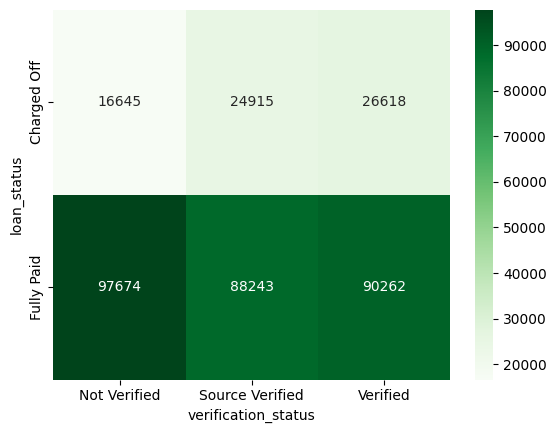

------------------------------------------------------------------------------------------------------------------------------------------------------


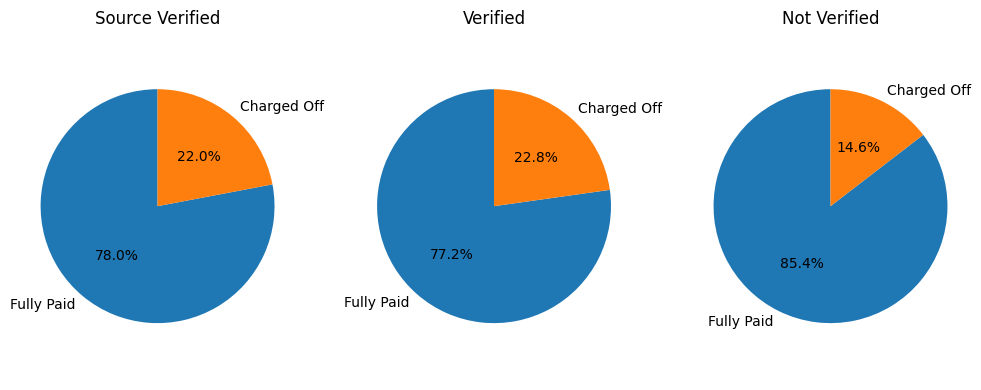

In [ ]:
print('-'*150)
contingency_table = pd.crosstab(df['loan_status'], df['verification_status'])
do_chisquare(df['loan_status'], df['verification_status'])

print('-'*150)
sns.heatmap(contingency_table, annot=True, fmt='d', cmap='Greens')
plt.show()

print('-'*150)

verification_statuses = ["Source Verified", "Verified", "Not Verified"]
colors = ["skyblue", "lightgreen", "coral"]

fig, axes = plt.subplots(1, 3, figsize=(10, 4))

for i, status in enumerate(verification_statuses):
    df_filtered = df[df['verification_status'] == status]
    status_counts = df_filtered['loan_status'].value_counts()
    labels = status_counts.index.to_numpy()
    sizes = status_counts.to_numpy()


    axes[i].pie(sizes, labels=labels, autopct='%1.1f%%', shadow=False,
                startangle=90, pctdistance=0.55, rotatelabels=False)
    axes[i].set_title(f'{status}')
    axes[i].axis('equal')

plt.tight_layout()
plt.show()

**Insights:**
- Contrary to expectations, the unverified group has the highest ratio of fully paid to charged off loan ratio.

**Recommendations:**
- While selecting clients to give loan to, verification status should not be used as a defining criteria as the unverified group had a statistically significant and higher proportion of repayment of loans

------------------------------------------------------------------------------------------------------------------------------------------------------
Reject the null hypothesis. There is A SIGNIFICANT ASSOCIATION between the columns
------------------------------------------------------------------------------------------------------------------------------------------------------


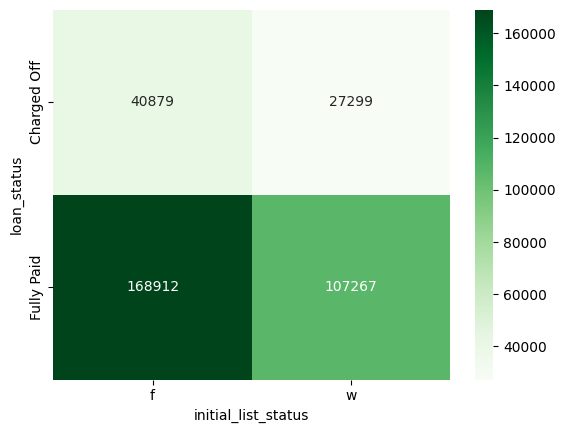

------------------------------------------------------------------------------------------------------------------------------------------------------


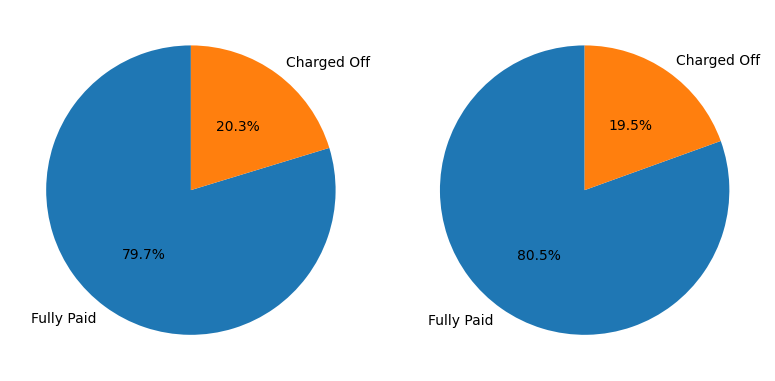

In [ ]:
print('-'*150)
contingency_table = pd.crosstab(df['loan_status'], df['initial_list_status'])
do_chisquare(df['loan_status'], df['initial_list_status'])

print('-'*150)
sns.heatmap(contingency_table, annot=True, fmt='d', cmap='Greens')
plt.show()

print('-'*150)

mortgage_statuses = ['w', 'f']

fig, axes = plt.subplots(1, 2, figsize=(8, 4))

for i, status in enumerate(mortgage_statuses):
    df_filtered = df[df['initial_list_status'] == status]
    status_counts = df_filtered['loan_status'].value_counts()
    labels = status_counts.index.to_numpy()
    sizes = status_counts.to_numpy()

    axes[i].pie(sizes, labels=labels, autopct='%1.1f%%', shadow=False,
                startangle=90, pctdistance=0.55, rotatelabels=False)

plt.tight_layout()
plt.show()

**Insights:**
- The initial listing status of the loan has no direct effect on the ability of a user to pay loan or not

**Recommendation:**
- Initial listing of the loan can be avoided while making decisions to give loan to someone or not

------------------------------------------------------------------------------------------------------------------------------------------------------
Reject the null hypothesis. There is A SIGNIFICANT ASSOCIATION between the columns
------------------------------------------------------------------------------------------------------------------------------------------------------


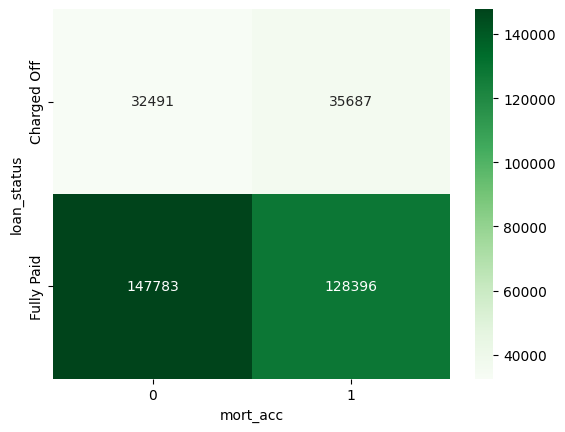

------------------------------------------------------------------------------------------------------------------------------------------------------


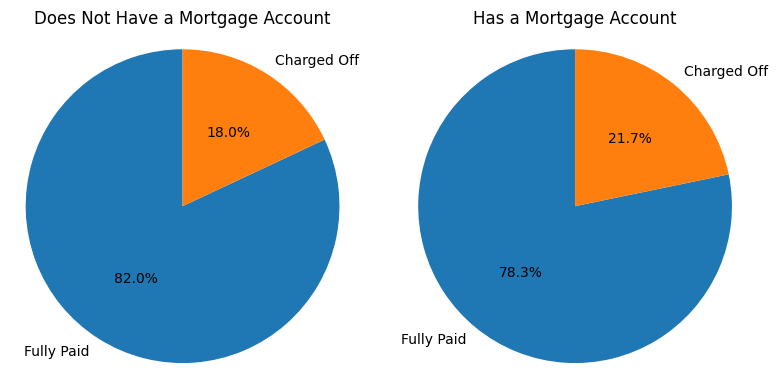

In [ ]:
print('-'*150)
contingency_table = pd.crosstab(df['loan_status'], df['mort_acc'])
do_chisquare(df['loan_status'], df['mort_acc'])

print('-'*150)
sns.heatmap(contingency_table, annot=True, fmt='d', cmap='Greens')
plt.show()

print('-'*150)

mortgage_statuses = [0, 1]

fig, axes = plt.subplots(1, 2, figsize=(8, 4))

for i, status in enumerate(mortgage_statuses):
    df_filtered = df[df['mort_acc'] == status]
    status_counts = df_filtered['loan_status'].value_counts()
    labels = status_counts.index.to_numpy()
    sizes = status_counts.to_numpy()

    axes[i].pie(sizes, labels=labels, autopct='%1.1f%%', shadow=False,
                startangle=90, pctdistance=0.55, rotatelabels=False)

    if status == 0:
        axes[i].set_title(f'Does Not Have a Mortgage Account')
    else:
        axes[i].set_title(f'Has a Mortgage Account')
    axes[i].axis('equal')

plt.tight_layout()
plt.show()

**Insights:**
- Having a mortgage account and tendency of not repaying a loan are related to each other
- No. of people who have repaid loans are higher in the group that does not have a mortgage account

**Recommendations:**
- While giving loans to people, not having a mortgage should be counted as a positive

----------------------------------------------------------------------------------------------------
Reject the null hypothesis. There is A SIGNIFICANT ASSOCIATION between the columns
----------------------------------------------------------------------------------------------------


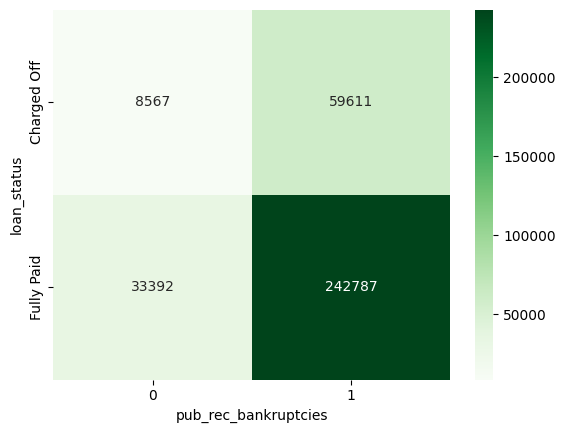

----------------------------------------------------------------------------------------------------


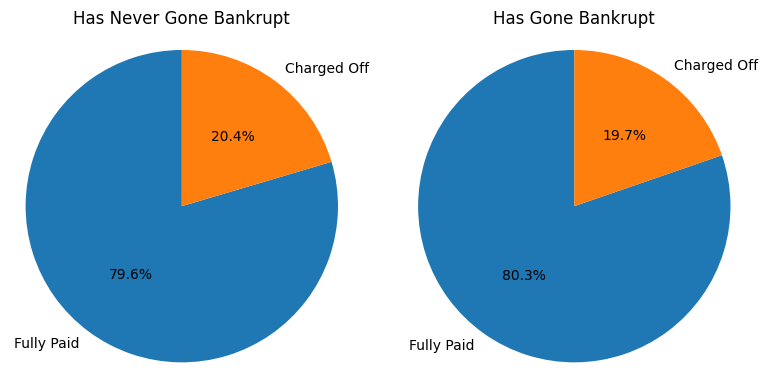

In [ ]:
print('-'*100)
contingency_table = pd.crosstab(df['loan_status'], df['pub_rec_bankruptcies'])
do_chisquare(df['loan_status'], df['pub_rec_bankruptcies'])

print('-'*100)
sns.heatmap(contingency_table, annot=True, fmt='d', cmap='Greens')
plt.show()

print('-'*100)

bankruptcy_statuses = [0, 1]

fig, axes = plt.subplots(1, 2, figsize=(8, 4))

for i, status in enumerate(bankruptcy_statuses):
    df_filtered = df[df['pub_rec_bankruptcies'] == status]
    status_counts = df_filtered['loan_status'].value_counts()
    labels = status_counts.index.to_numpy()
    sizes = status_counts.to_numpy()

    axes[i].pie(sizes, labels=labels, autopct='%1.1f%%', shadow=False,
                startangle=90, pctdistance=0.55, rotatelabels=False)
    if status == 0:
        axes[i].set_title(f'Has Never Gone Bankrupt')
    else:
        axes[i].set_title(f'Has Gone Bankrupt')
    axes[i].axis('equal')

plt.tight_layout()
plt.show()

**Insights:**

- Probability of not paying a loan and having a public recorded bankruptcy are not strongly related to each other
- No. of people who have repaid loans are more or less same in both the groups split on having or not having a public bankruptcy record

**Recommendations:**
- While making decisions on selecting clinets to give loan to, give preference to clients who have **no mortgage accounts**.
- Public bankruptcy record of a client **does not have that much of an effect** on the client's ability to repay back the loans


----------------------------------------------------------------------------------------------------
Reject the null hypothesis. There is A SIGNIFICANT ASSOCIATION between the columns
----------------------------------------------------------------------------------------------------


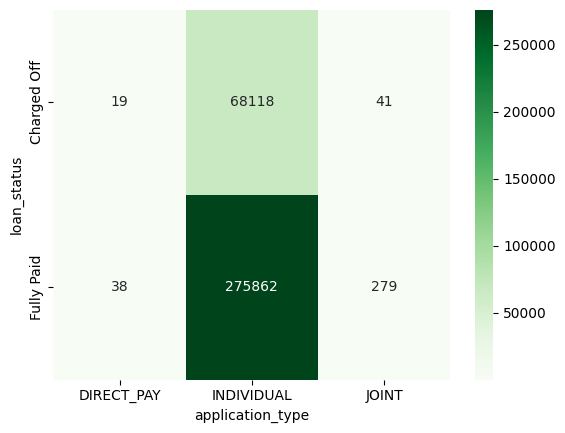

----------------------------------------------------------------------------------------------------


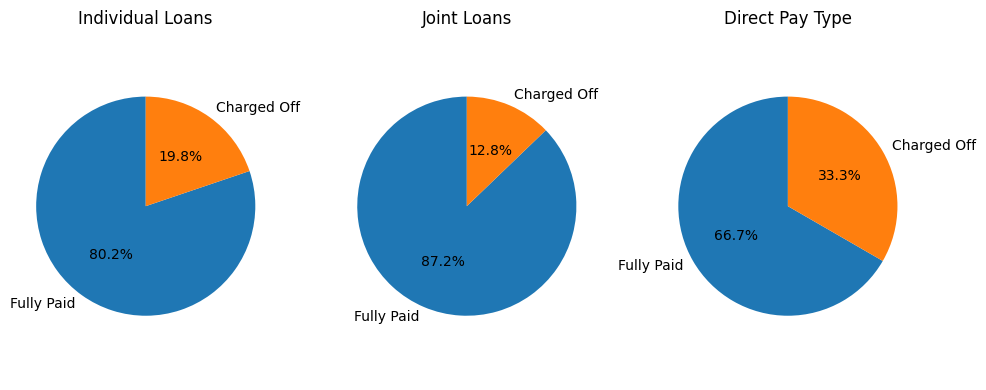

In [ ]:
print('-'*100)
contingency_table = pd.crosstab(df['loan_status'], df['application_type'])
do_chisquare(df['loan_status'], df['application_type'])

print('-'*100)
sns.heatmap(contingency_table, annot=True, fmt='d', cmap='Greens')
plt.show()

print('-'*100)

b = ['INDIVIDUAL', 'JOINT', 'DIRECT_PAY']

fig, axes = plt.subplots(1, 3, figsize=(10, 4))

for i, status in enumerate(b):
    df_filtered = df[df['application_type'] == status]
    status_counts = df_filtered['loan_status'].value_counts()
    labels = status_counts.index.to_numpy()
    sizes = status_counts.to_numpy()

    axes[i].pie(sizes, labels=labels, autopct='%1.1f%%', shadow=False,
                startangle=90, pctdistance=0.55, rotatelabels=False)
    if status == 'INDIVIDUAL':
        axes[i].set_title('Individual Loans')
    elif status == 'JOINT':
        axes[i].set_title('Joint Loans')
    else:
        axes[i].set_title(f'Direct Pay Type')
    axes[i].axis('equal')

plt.tight_layout()
plt.show()

**Insights:**
- Joint Loans have the highest charged off percentage
- Direct Pay type loans are the least like to get repaid

**Recommendations:**
- While giving away loans, **Joint loans should have highest priority**
- **Direct Pay type loans have to be avoided** while giving away loans due to their history

In [ ]:
df[categorical_cols]

,term,grade,sub_grade,emp_length,home_ownership,verification_status,issue_d,loan_status,purpose,earliest_cr_line,initial_list_status,application_type
0,36 months,B,B4,10+ years,RENT,Not Verified,Jan-15,Fully Paid,vacation,Jun-90,w,INDIVIDUAL
1,36 months,B,B5,4 years,MORTGAGE,Not Verified,Jan-15,Fully Paid,debt_consolidation,Jul-04,f,INDIVIDUAL
2,36 months,B,B3,< 1 year,RENT,Source Verified,Jan-15,Fully Paid,credit_card,Aug-07,f,INDIVIDUAL
3,36 months,A,A2,6 years,RENT,Not Verified,Nov-14,Fully Paid,credit_card,Sep-06,f,INDIVIDUAL
4,60 months,C,C5,9 years,MORTGAGE,Verified,Apr-13,Charged Off,credit_card,Mar-99,f,INDIVIDUAL
...,...,...,...,...,...,...,...,...,...,...,...,...
396024,36 months,B,B4,5 years,RENT,Not Verified,Mar-13,Fully Paid,debt_consolidation,Nov-91,w,INDIVIDUAL
396025,60 months,B,B4,2 years,RENT,Source Verified,Oct-15,Fully Paid,debt_consolidation,Nov-04,w,INDIVIDUAL
396027,36 months,B,B1,10+ years,RENT,Verified,Oct-13,Fully Paid,debt_consolidation,Mar-97,f,INDIVIDUAL
396028,60 months,C,C2,10+ years,MORTGAGE,Verified,Aug-12,Fully Paid,debt_consolidation,Nov-90,f,INDIVIDUAL


------------------------------------------------------------------------------------------------------------------------------------------------------
Reject the null hypothesis. There is A SIGNIFICANT ASSOCIATION between the columns
------------------------------------------------------------------------------------------------------------------------------------------------------


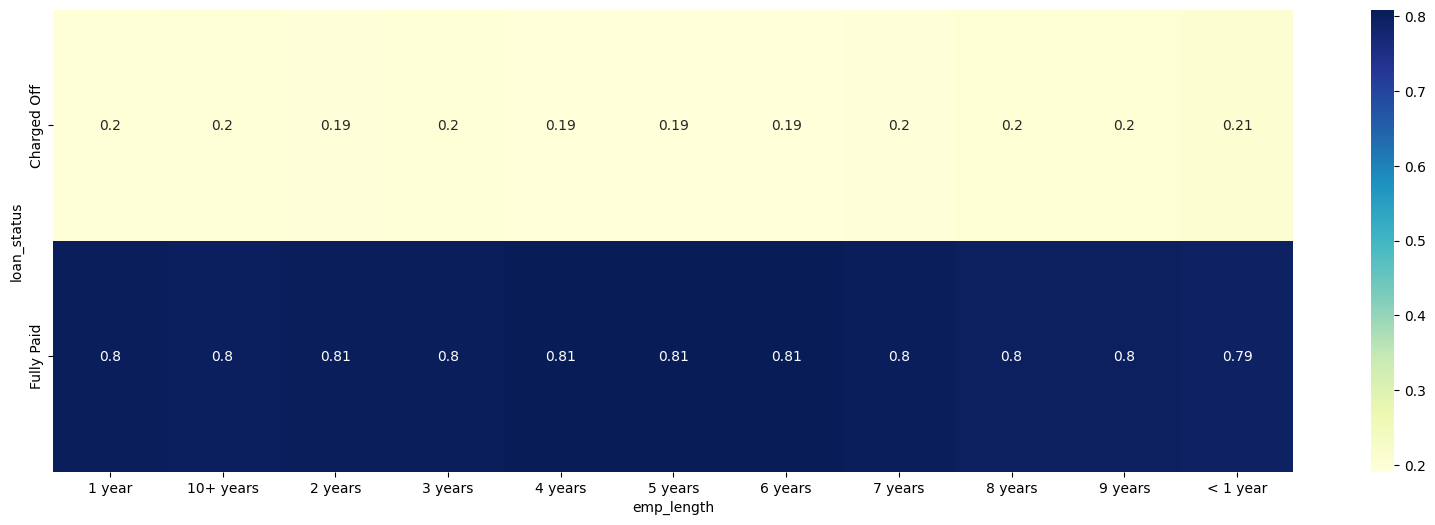

------------------------------------------------------------------------------------------------------------------------------------------------------


In [ ]:
print('-'*150)
contingency_table = pd.crosstab(df['loan_status'], df['emp_length'], normalize='columns')
do_chisquare(df['loan_status'], df['emp_length'])

print('-'*150)
plt.figure(figsize=(20, 6))
sns.heatmap(contingency_table, annot=True, cmap='YlGnBu')
plt.show()

print('-'*150)

**Insights:**
- Some significant relationship exits between defaulter's employment duration and loan repayment tendency
- People with employment duration > 10 years pay back their loan well.
- People with < 1 years of job duration are the worst in repaying loan

**Recommendations:**

- More experienced people should be preferred while giving loans
- Loans should be given to people with new jobs only after immense scrutiny

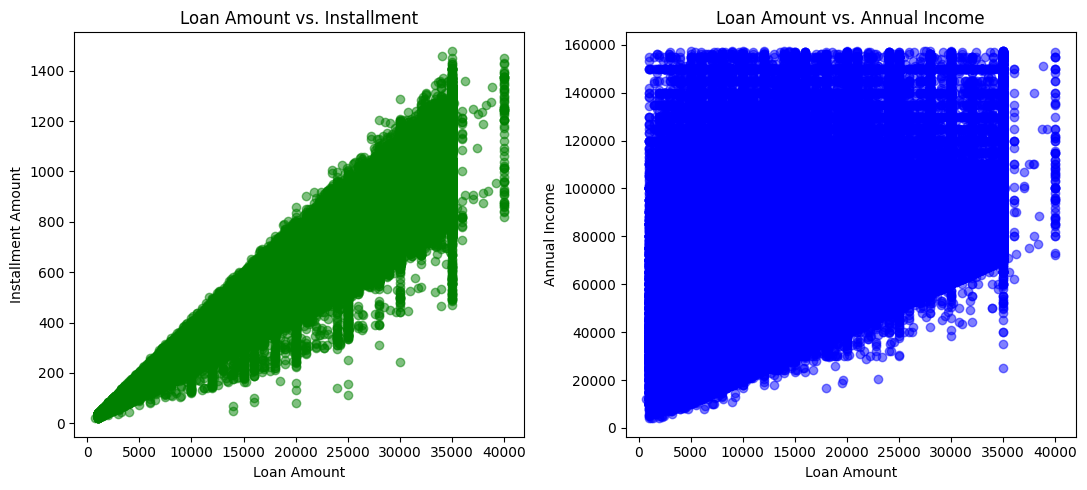

In [ ]:
plt.figure(figsize=(11, 5))

plt.subplot(1, 2, 1)
plt.scatter(df['loan_amnt'], df['installment'], alpha=0.5, c='green')
plt.xlabel('Loan Amount')
plt.ylabel('Installment Amount')
plt.title('Loan Amount vs. Installment')

plt.subplot(1, 2, 2)
plt.scatter(df['loan_amnt'], df['annual_inc'], alpha=0.5, c='blue')
plt.xlabel('Loan Amount')
plt.ylabel('Annual Income')
plt.title('Loan Amount vs. Annual Income')

plt.tight_layout()

plt.show()

**Insights:**
- The relationship between loan amount and monthly installment is pretty straightforward, as one increases, other does as well
- The relationship between Loan amount and Annual income is not that linear or straightforward


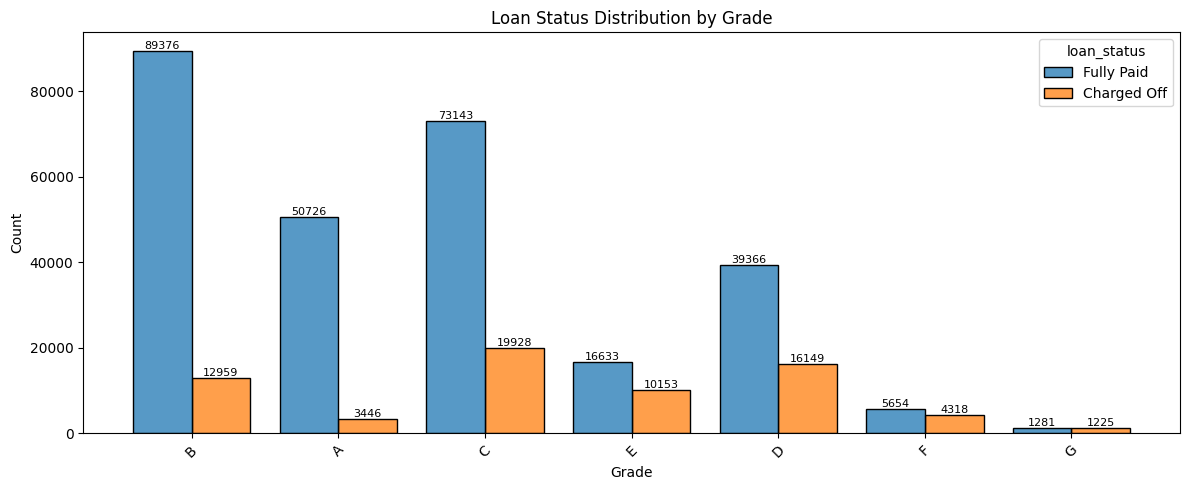

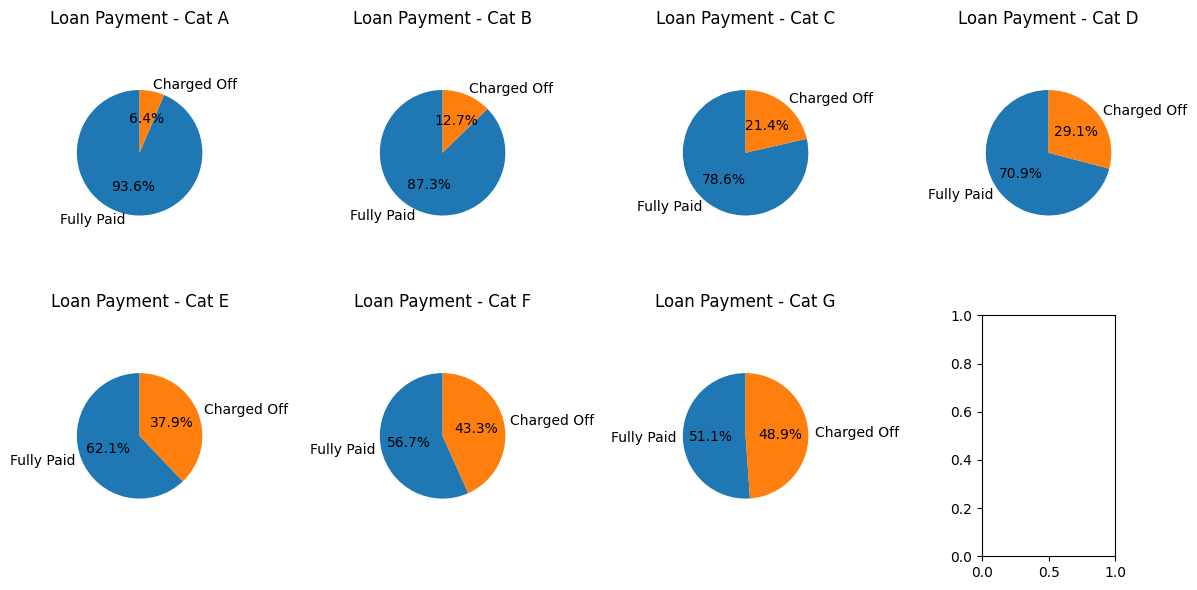

grade
B    102335
C     93071
D     55515
A     54172
E     26786
F      9972
G      2506
Name: count, dtype: int64


In [ ]:
plt.figure(figsize=(12, 5))

g = sns.histplot(data=df, x='grade', hue='loan_status', multiple='dodge', shrink=.8)
bars = g.containers
for container in bars:
  for bar in container:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval + 0.1, int(yval),
             ha='center', va='bottom', fontsize=8)
plt.xlabel('Grade')
plt.ylabel('Count')
plt.title('Loan Status Distribution by Grade')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

df1 = df[['grade','loan_status']]
grades = ['A', 'B', 'C', 'D', 'E', 'F', 'G']
fig, axes = plt.subplots(2, 4, figsize=(12, 6))


for i, grade in enumerate(grades):
  row, col = divmod(i, 4)

  dfa = df1[df1['grade'] == grade]
  status_counts = dfa['loan_status'].value_counts()

  labels = status_counts.index.to_numpy()
  sizes = status_counts.to_numpy()

  axes[row, col].pie(sizes, labels=labels, autopct='%1.1f%%', shadow=False,
                    startangle=90, pctdistance=0.55, rotatelabels=False)
  axes[row, col].set_title(f'Loan Payment - Cat {grade}')
  axes[row, col].axis('equal')

plt.tight_layout()
plt.show()

print(df['grade'].value_counts())

**Insights:**
- Grade does seem to have an effect on the loan repayment ratio. Grade A clients have the highest loan repayment ratio and it decreases monotonically as we move alphabetically to grade G
- The no. of users in different grades do not follow a pattern, unike loan repayment ratio.
- Grade B has the highest no. of clients followed by Grade C and Grade D. Grade G has the lowest no. of clients

**Recommendations:**
- The Grading system captures the loan repayment ability of the customers quite well and thus can be used as a metric to check the loan eligibility.
- Grade A should be given the highest priority while Grade G the lowest.

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving logistic_regression (1)-Job_Titles.csv to logistic_regression (1)-Job_Titles.csv


In [ ]:
dafa = pd.read_csv(io.BytesIO(uploaded['logistic_regression (1)-Job_Titles.csv']))
dt = dafa.copy()

,loan_amnt,emp_title,annual_inc,loan_status,dti
0,10000,Marketing,117000.0,Fully Paid,26.24
1,8000,Credit analyst,65000.0,Fully Paid,22.05
2,15600,Statistician,43057.0,Fully Paid,12.79


In [ ]:
print(dt.head(3))
print()
print(dt['emp_title'].value_counts(ascending=False).head(10))

   loan_amnt        emp_title  annual_inc loan_status    dti
0      10000        Marketing    117000.0  Fully Paid  26.24
1       8000  Credit analyst      65000.0  Fully Paid  22.05
2      15600     Statistician     43057.0  Fully Paid  12.79

emp_title
Teacher             4389
Manager             4250
Registered Nurse    1856
RN                  1846
Supervisor          1830
Sales               1638
Project Manager     1505
Owner               1410
Driver              1339
Office Manager      1218
Name: count, dtype: int64


## **Logistic Regression**

**Feature Engineering**

In [ ]:
# Correcting the Type of the Term column for use in Logistic Regression

df['term'] = df['term'].str.replace(' months', '').astype(int)

In [ ]:
# Changing Grade to Numerical Values (Giving Highest Priority to Grade A and lowest to Grade G, as
# per the bivariate analysis)

grading = {'A': 7, 'B': 6, 'C': 5, 'D': 4, 'E': 3, 'F': 2, 'G': 1}
df['grade'] = df['grade'].map(grading)

# making Loan Status a Binary Categorical Column

df['loan_status'] = df['loan_status'].apply(lambda x: 1 if x == 'Fully Paid' else 0)

**Target Encoding**

In [ ]:
# ANOVA to test the validity of Target Encoding

from scipy.stats import f_oneway

def do_anova_encode(df, cat_col, num_col, alpha=0.05):

    groups = df.groupby(cat_col)[num_col].apply(list)

    F_statistic, p_value = f_oneway(*groups)

    if p_value < alpha:
        print("Reject null hypothesis")
        print("There is a significant difference in means between groups.")
        df[cat_col] = df.groupby(cat_col)[num_col].transform('mean')
        print(f"Column [{cat_col}] has been Target Encoded using [{num_col}] by mean")
    else:
        print("Fail to reject null hypothesis")
        print("There is no significant difference in means between groups.")
        print(f"Column [{cat_col}] was NOT Target Encoded")
    print("-"*100)

# --------------------------------------------------------------------------------------------------------------

print(df['emp_length'].nunique())
do_anova_encode(df, 'emp_length', 'annual_inc')

print(df['home_ownership'].nunique())
do_anova_encode(df, 'home_ownership', 'dti')

print(df['purpose'].nunique())
do_anova_encode(df, 'purpose', 'loan_amnt')

print(df['issue_d'].nunique())
do_anova_encode(df, 'issue_d', 'open_acc')

print(df['verification_status'].nunique())
do_anova_encode(df, 'verification_status', 'open_acc')

print(df['sub_grade'].nunique())
do_anova_encode(df, 'sub_grade', 'loan_amnt')

print(df['earliest_cr_line'].nunique())
do_anova_encode(df, 'earliest_cr_line', 'loan_amnt')

print(df['application_type'].nunique())
do_anova_encode(df, 'application_type', 'grade')

print(df['initial_list_status'].nunique())
do_anova_encode(df, 'initial_list_status', 'grade')

11
Reject null hypothesis
There is a significant difference in means between groups.
Column [emp_length] has been Target Encoded using [annual_inc] by mean
----------------------------------------------------------------------------------------------------
6
Reject null hypothesis
There is a significant difference in means between groups.
Column [home_ownership] has been Target Encoded using [dti] by mean
----------------------------------------------------------------------------------------------------
14
Reject null hypothesis
There is a significant difference in means between groups.
Column [purpose] has been Target Encoded using [loan_amnt] by mean
----------------------------------------------------------------------------------------------------
112
Reject null hypothesis
There is a significant difference in means between groups.
Column [issue_d] has been Target Encoded using [open_acc] by mean
-------------------------------------------------------------------------------------

**Checking Data**

In [ ]:
df.head(3)

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,dti,earliest_cr_line,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies
0,10000,36,11.44,329.48,6,13129.977893,77223.417414,17.317143,117000.0,10.883069,11.790103,1,6234.049959,26.24,15989.379845,16,1,36369,41.8,25,5.208706,5.179748,1,1
1,8000,36,11.99,265.68,6,12609.268121,72782.756352,17.338230,65000.0,10.883069,11.790103,1,14883.142944,22.05,13110.338886,17,1,20131,53.3,27,5.157395,5.179748,0,1
2,15600,36,10.49,506.97,6,12929.914321,69177.142043,17.317143,43057.0,11.321673,11.790103,1,14486.975266,12.79,11055.193735,13,1,11987,92.2,26,5.157395,5.179748,1,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 395219 entries, 0 to 396029
Data columns (total 24 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             395219 non-null  int64  
 1   term                  395219 non-null  int64  
 2   int_rate              395219 non-null  float64
 3   installment           395219 non-null  float64
 4   grade                 395219 non-null  int64  
 5   sub_grade             395219 non-null  float64
 6   emp_length            395219 non-null  float64
 7   home_ownership        395219 non-null  float64
 8   annual_inc            395219 non-null  float64
 9   verification_status   395219 non-null  float64
 10  issue_d               395219 non-null  float64
 11  loan_status           395219 non-null  int64  
 12  purpose               395219 non-null  float64
 13  dti                   395219 non-null  float64
 14  earliest_cr_line      395219 non-null  float64
 15  open_

**Choosing between MinMax and Standard Scaling**

In [ ]:
x = df.drop('loan_status', axis=1)
y = df['loan_status']

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression


xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2, random_state =1)


from sklearn.preprocessing import MinMaxScaler
maxa = MinMaxScaler()
xtrain1 = maxa.fit_transform(xtrain)
xtest1 = maxa.fit_transform(xtest)

lom = LogisticRegression()
lom.fit(xtrain1, ytrain)
print("For Min Max Scaling, accuracy is:", lom.score(xtest1,ytest))


from sklearn.preprocessing import StandardScaler
scala = StandardScaler()
xtrain2 = scala.fit_transform(xtrain)
xtest2 = scala.fit_transform(xtest)

los = LogisticRegression()
los.fit(xtrain2, ytrain)
print("For Standard Scaling, accuracy is:", los.score(xtest2,ytest))

For Min Max Scaling, accuracy is: 0.5657887094900685
For Standard Scaling, accuracy is: 0.8034179347194796


**Insight:**
- For a rough estimate, The Standard Scaler was the better option to preprocess the data

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

# Function for Overall Accuracy score

def accuracy(y_true, y_pred):
  return np.sum(y_true==y_pred)/y_true.shape[0]

In [ ]:
x = df.drop('loan_status', axis=1)
y = df['loan_status']

**Choosing Best C-Value for Analysis (Using Half of the Dataset for Computational Ease) - Data Preparation**

In [ ]:
x = df.drop('loan_status', axis=1)
y = df['loan_status']

xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.5, random_state =1)

# Halving the data for parameter tests

xtrain_1, xtest_1, ytrain_1, ytest_1 = train_test_split(xtrain, ytrain, test_size=0.2, random_state =1)

from imblearn.over_sampling import SMOTE
ruso = SMOTE()
xtrain, ytrain = ruso.fit_resample(xtrain_1, ytrain_1)

**Choosing Best C-Value for Analysis (Using Half of the Dataset for Computational Ease)**

In [ ]:
best_Testing_accuracy = 0.0001
C_Value = None
Traininng_accuracy = None
Precision = None

for i in [1,0.1,0.01,0.001, 0.0001, 10,100, 1000, 10000, 100000]:

  seda = StandardScaler()
  xtrain_1 = seda.fit_transform(xtrain_1)
  xtest_1 = seda.fit_transform(xtest_1)

  lod1 = LogisticRegression(C = i)
  lod1.fit(xtrain_1, ytrain_1)

  y_tr = lod1.predict(xtrain_1)
  y_te = lod1.predict(xtest_1)

  p = precision_score(ytest_1, y_te)
  r = recall_score(ytest_1,y_te)

  train_score = lod1.score(xtrain_1, ytrain_1)
  test_score = lod1.score(xtest_1, ytest_1)

  print()
  print("For C =", i)
  print("Train Score", train_score, "Test Score", test_score, "Precision ->", p)

  if test_score > best_Testing_accuracy:
    best_Testing_accuracy = test_score
    C_Value = i
    Traininng_accuracy = train_score
    Precision = p


print("-"*100)
print("Best Testing Accuracy:", test_score, "at C = ", C_Value)
print("Training Accuracy was :", train_score)
print("Precision was :", p)


For C = 1
Train Score 0.8048036840473917 Test Score 0.8075755275542735 Precision -> 0.814809041309431

For C = 0.1
Train Score 0.8047910327857446 Test Score 0.807626132280755 Precision -> 0.8148350220836581

For C = 0.01
Train Score 0.8047910327857446 Test Score 0.807727341733718 Precision -> 0.8148379052369077

For C = 0.001
Train Score 0.804784707154921 Test Score 0.8080309700926066 Precision -> 0.8145851709645618

For C = 0.0001
Train Score 0.8044810768753914 Test Score 0.8075502251910328 Precision -> 0.8115342092407374

For C = 10
Train Score 0.8047973584165681 Test Score 0.8075755275542735 Precision -> 0.814809041309431

For C = 100
Train Score 0.8047973584165681 Test Score 0.8075755275542735 Precision -> 0.814809041309431

For C = 1000
Train Score 0.8047973584165681 Test Score 0.8075755275542735 Precision -> 0.814809041309431

For C = 10000
Train Score 0.8047973584165681 Test Score 0.8075755275542735 Precision -> 0.814809041309431

For C = 100000
Train Score 0.8047973584165681 T

**Analysing Finalised Model (Using the entire Dataset)**

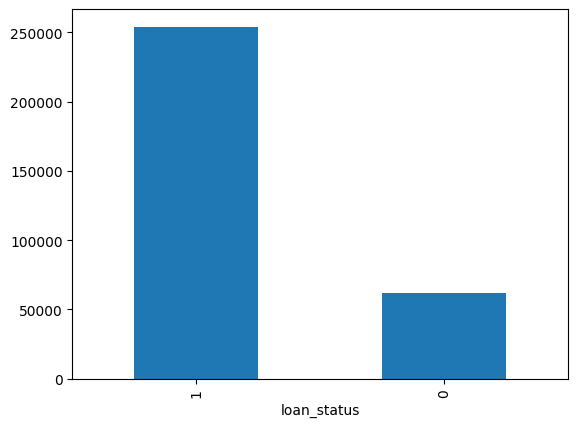

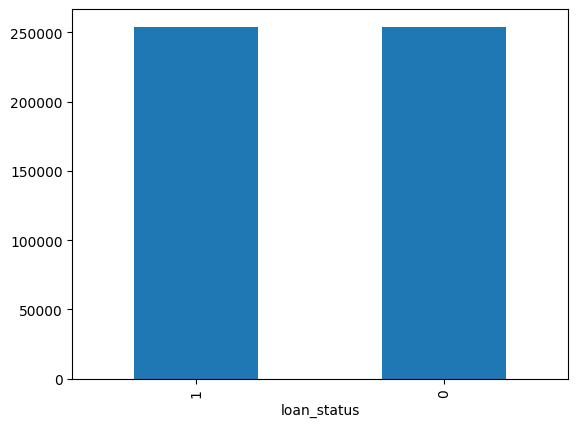

----------------------------------------------------------------------------------------------------
Score for Training is:  0.7069616317148435
Score for Testing is:  0.5818910986286119
Prescision is:  0.8814197700231973
----------------------------------------------------------------------------------------------------
[0.28322692 0.18163059 0.16320917 ... 0.46004439 0.90680628 0.21561244]
----------------------------------------------------------------------------------------------------


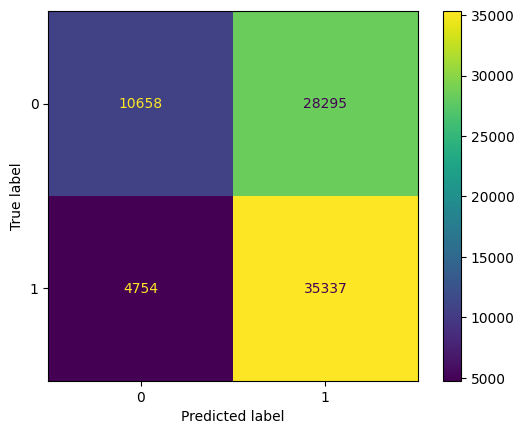

0.6729266934872271
----------------------------------------------------------------------------------------------------


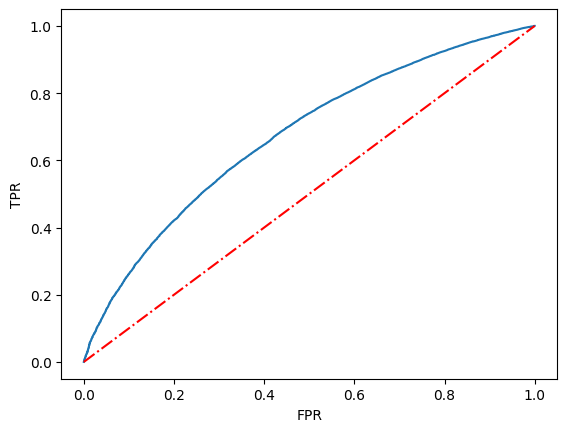

AUC Value:  0.6729266934872271
----------------------------------------------------------------------------------------------------


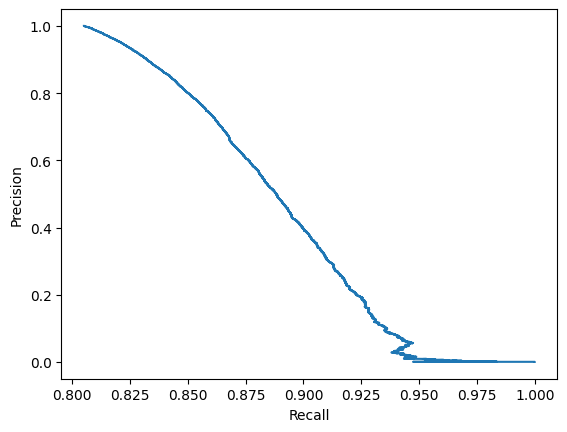

(array([[-0.09877695, -0.12218173,  0.96270448,  0.04390794,  2.02118314,
          0.43875151,  0.04455904, -0.01389358,  0.19968303, -0.0315957 ,
          0.01727568, -0.01955059, -0.70292426,  0.0584718 , -0.06193763,
          0.25561916,  0.03777897, -0.0798276 ,  0.19488766,  0.03847014,
         -0.02253452,  0.27339386, -0.03563126]]),
 array([0.00351618]))

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

x = df.drop('loan_status', axis=1)
y = df['loan_status']

xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2, random_state =1)

ytrain.value_counts().plot(kind='bar')
plt.show()

# Using SMOTE for Oversampling

ruso = SMOTE()
xtrain, ytrain = ruso.fit_resample(xtrain, ytrain)

ytrain.value_counts().plot(kind='bar')
plt.show()

# Scaling and Training - Standard Scaler and C = 0.001

seda = StandardScaler()
xtrain = seda.fit_transform(xtrain)
xtest = seda.fit_transform(xtest)

lod = LogisticRegression(C = 0.001)
lod.fit(xtrain, ytrain)

y_ = lod.predict(xtest)

tr = lod.score(xtrain, ytrain)

te = lod.score(xtest, ytest)

p = precision_score(ytest, y_)

print("-"*100)
print('Score for Training is: ',tr)
print('Score for Testing is: ',te)
print('Prescision is: ',p)
print("-"*100)

pogba = lod.predict_proba(xtest)[:,1]
print(pogba)
print("-"*100)


# Displaying Results

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, auc, roc_curve, roc_auc_score

cm = confusion_matrix(y_, ytest)

ConfusionMatrixDisplay(cm).plot()
plt.show()

print(roc_auc_score(ytest, pogba))
print("-"*100)
f, t, th = roc_curve(ytest, pogba)
plt.plot(f,t)
plt.plot(f,f, '-.', color = 'red')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.show()

print('AUC Value: ',auc(f,t))
print("-"*100)

from sklearn.metrics import precision_recall_curve
p,r,t = precision_recall_curve(ytest, pogba)
plt.plot(p,r)
plt.xlabel('Recall')
plt.ylabel('Precision')

plt.show()


# Extracting Coefficients Weight and Intercept

lod.coef_ , lod.intercept_

[('loan_amnt', -0.09747830213291636), ('term', -0.12197265799051528), ('int_rate', 0.9667409247457195), ('installment', 0.041027165958661876), ('grade', 2.0234240394922365), ('sub_grade', 0.4384856625914939), ('emp_length', 0.04448322490010023), ('home_ownership', -0.01666294588320831), ('annual_inc', 0.19398249930703473), ('verification_status', -0.032866963494767774), ('issue_d', 0.01862486579759661), ('purpose', -0.020424110827522733), ('dti', -0.6677837912654905), ('earliest_cr_line', 0.05985442309637497), ('open_acc', -0.06303067313093436), ('pub_rec', 0.25503253096742745), ('revol_bal', 0.041580290981028646), ('revol_util', -0.07920568406929133), ('total_acc', 0.1989129288644353), ('initial_list_status', 0.03676600126650648), ('application_type', -0.024633414010032145), ('mort_acc', 0.27508976787326334), ('pub_rec_bankruptcies', -0.037198119271387754)]


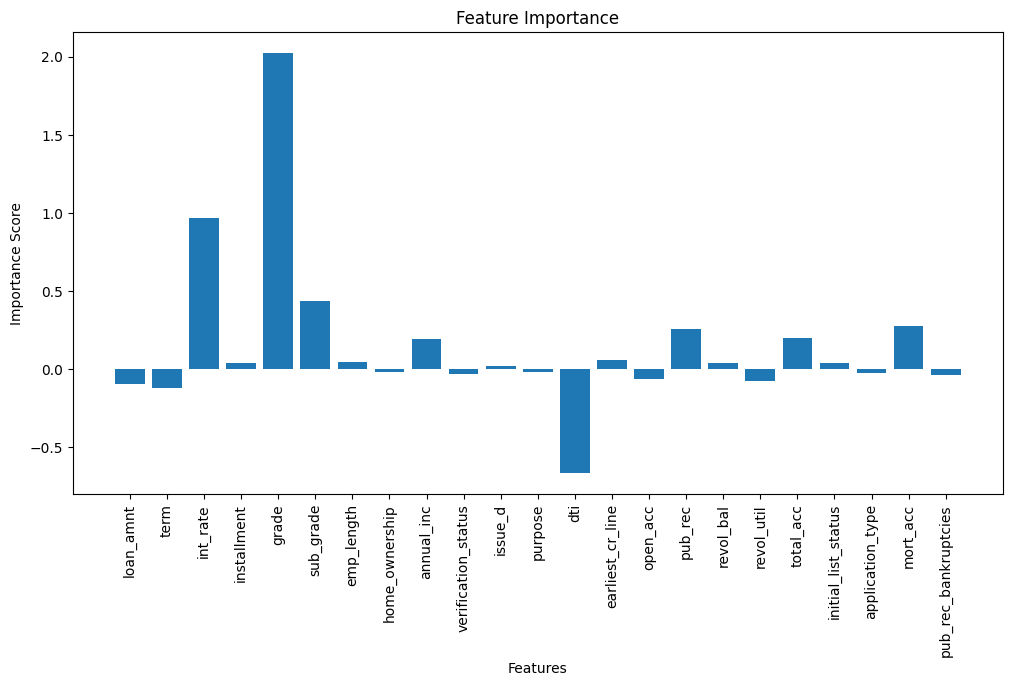

In [ ]:
coefficients = lod.coef_[0]
coefficient_list = coefficients.tolist()

column_names = x.columns.tolist()

zipped_list = list(zip(column_names, coefficient_list))
print(zipped_list)

plt.figure(figsize=(12, 6))
plt.bar(column_names, coefficient_list)
plt.xticks(rotation=90)
plt.xlabel("Features")
plt.ylabel("Importance Score")
plt.title("Feature Importance")
plt.show()